# Análise das variáveis

Agora nós vamos analisar todas as variáveis (features) criadas para avaliar seu poder preditivo. Caso, não seja possível identificar variáveis com grande poder preditivo, nós vamos criar mais algumas, como a diferença entre o time visitante e o time da casa. 

Para a simplificação do problema, nós vamos apenas retirar os resultados que são empates da base, para ficarmos com um problema binário vitória/derrota.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/full_features_of_matches.csv")
team_stats = pd.read_csv("data/team_stats_by_match.csv")

In [3]:
df = df.query("result != 2")

In [4]:
df['result'].value_counts()

0    1562
1     914
Name: result, dtype: int64

Analysis that will be made:

- Violin and boxplot to analyze if the features have different distributions according to the target
- Scatter plots to analyze correlations

In [5]:
data_basics = df[["result", "rank_change_home", "rank_change_away", 'is_friendly_0', 'is_friendly_1']]
data_rank_dif = df[['result', 'rank_dif']]

data_home_goals = df[['home_goals_mean', 'home_goals_mean_l5', 'home_goals_mean_l10', 'home_goals_mean_l15', 'home_goals_mean_l30', "result"]]
data_away_goals = df[['away_goals_mean', 'away_goals_mean_l5', 'away_goals_mean_l10', 'away_goals_mean_l15', 'away_goals_mean_l30', "result"]]
data_home_suf_goals = df[['home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_goals_suf_mean_l10', 'home_goals_suf_mean_l15', 'home_goals_suf_mean_l30', "result"]]
data_away_suf_goals = df[['away_goals_suf_mean', 'away_goals_suf_mean_l5','away_goals_suf_mean_l10', 'away_goals_suf_mean_l15', 'away_goals_suf_mean_l30', "result"]]
data_home_rank = df[['home_rank_mean', 'home_rank_mean_l5', 'home_rank_mean_l10', 'home_rank_mean_l15', 'home_rank_mean_l30', "result"]]
data_away_rank = df[['away_rank_mean', 'away_rank_mean_l5', 'away_rank_mean_l10', 'away_rank_mean_l15', 'away_rank_mean_l30', "result"]]
data_home_points = df[['home_points_mean', 'home_points_mean_l5', 'home_points_mean_l10', 'home_points_mean_l15', 'home_points_mean_l30', "result"]]
data_away_points = df[['away_points_mean', 'away_points_mean_l5','away_points_mean_l10', 'away_points_mean_l15', 'away_points_mean_l30', "result"]]
data_home_game_points = df[['home_game_points_mean', 'home_game_points_mean_l5', 'home_game_points_mean_l10', 'home_game_points_mean_l15', 'home_game_points_mean_l30', "result"]]
data_away_game_points = df[['away_game_points_mean', 'away_game_points_mean_l5', 'away_game_points_mean_l10', 'away_game_points_mean_l15', 'away_game_points_mean_l30', "result"]]
data_home_game_points_rank = df[['home_game_points_rank_mean', 'home_game_points_rank_mean_l5', 'home_game_points_rank_mean_l10', 'home_game_points_rank_mean_l15', 'home_game_points_rank_mean_l30', "result"]]
data_away_game_points_rank = df[['away_game_points_rank_mean','away_game_points_rank_mean_l5', 'away_game_points_rank_mean_l10', 'away_game_points_rank_mean_l15', 'away_game_points_rank_mean_l30', "result"]]
data_home_game_points_classification = df[['home_game_points_by_classification_mean', 'home_game_points_by_classification_mean_l5', 'home_game_points_by_classification_mean_l10', 
                                            'home_game_points_by_classification_mean_l15', 'home_game_points_by_classification_mean_l30', "result"]]
data_away_game_points_classification = df[['away_game_points_by_classification_mean', 'away_game_points_by_classification_mean_l5','away_game_points_by_classification_mean_l10',
                                            'away_game_points_by_classification_mean_l15','away_game_points_by_classification_mean_l30', "result"]]


In [6]:
data_basics = pd.melt(data_basics, id_vars="result", var_name="features", value_name="value")
data_home_goals = pd.melt(data_home_goals, id_vars="result", var_name="features", value_name="value")
data_away_goals = pd.melt(data_away_goals, id_vars="result", var_name="features", value_name="value")
data_home_suf_goals = pd.melt(data_home_suf_goals, id_vars="result", var_name="features", value_name="value")
data_away_suf_goals = pd.melt(data_away_suf_goals, id_vars="result", var_name="features", value_name="value")
data_home_rank = pd.melt(data_home_rank, id_vars="result", var_name="features", value_name="value")
data_away_rank = pd.melt(data_away_rank, id_vars="result", var_name="features", value_name="value")
data_home_points = pd.melt(data_home_points, id_vars="result", var_name="features", value_name="value")
data_away_points = pd.melt(data_away_points, id_vars="result", var_name="features", value_name="value")
data_home_game_points = pd.melt(data_home_game_points, id_vars="result", var_name="features", value_name="value")
data_away_game_points = pd.melt(data_away_game_points, id_vars="result", var_name="features", value_name="value")
data_home_game_points_rank = pd.melt(data_home_game_points_rank, id_vars="result", var_name="features", value_name="value")
data_away_game_points_rank = pd.melt(data_away_game_points_rank, id_vars="result", var_name="features", value_name="value")
data_home_game_points_classification = pd.melt(data_home_game_points_classification, id_vars="result", var_name="features", value_name="value")
data_away_game_points_classification = pd.melt(data_away_game_points_classification, id_vars="result", var_name="features", value_name="value")
data_rank_dif = pd.melt(data_rank_dif, id_vars="result", var_name="features", value_name="value")

A maior diferença para as variável resposta nos gráficos com as covariáveis de rank_change_home, rank_change_away, rank_dif e classificação do jogo, é apenas no rank_dif que podemos notar uma clara diferença na distribuição dos dois possíveis resultados.

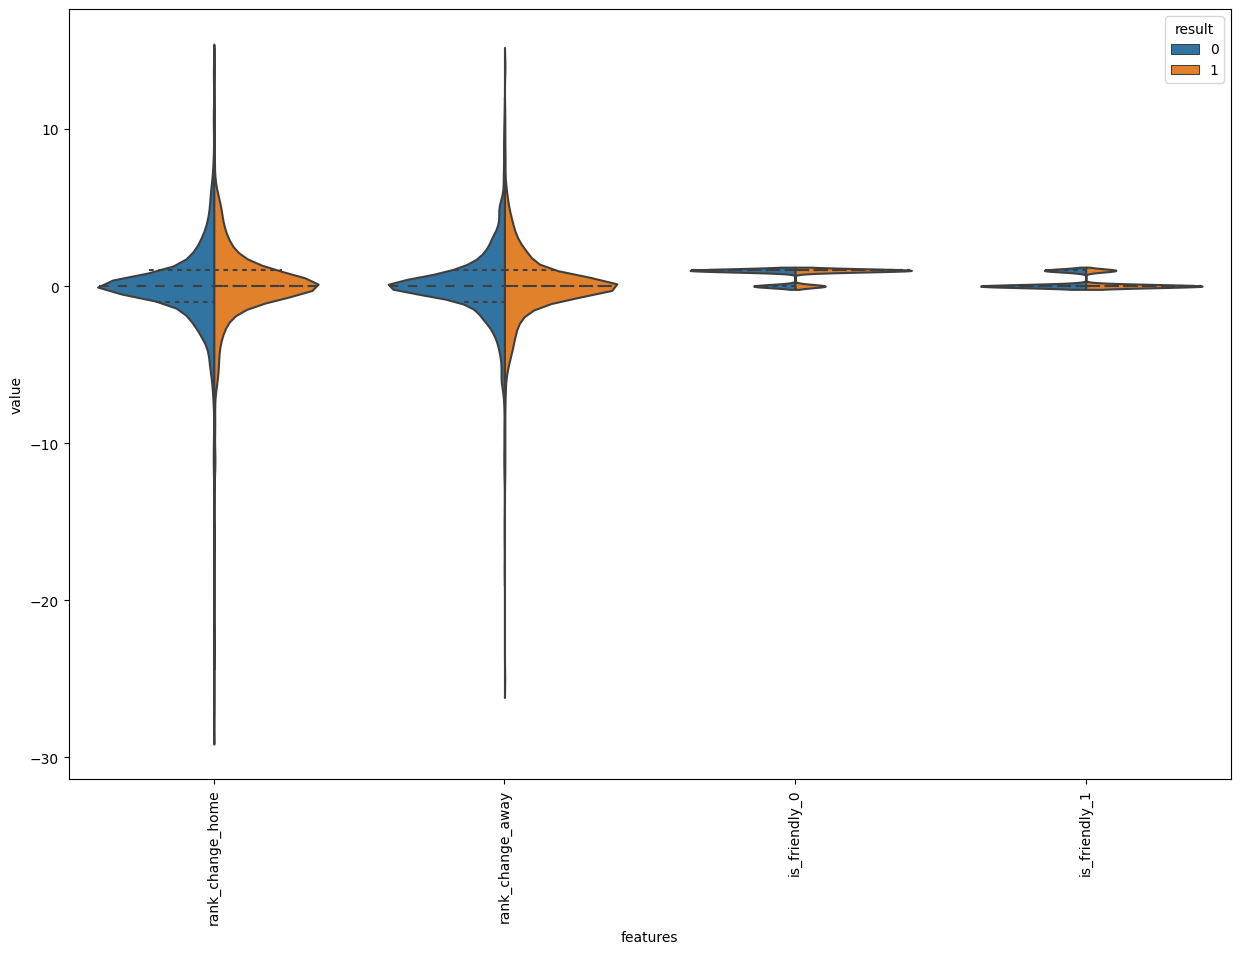

In [7]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_basics,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

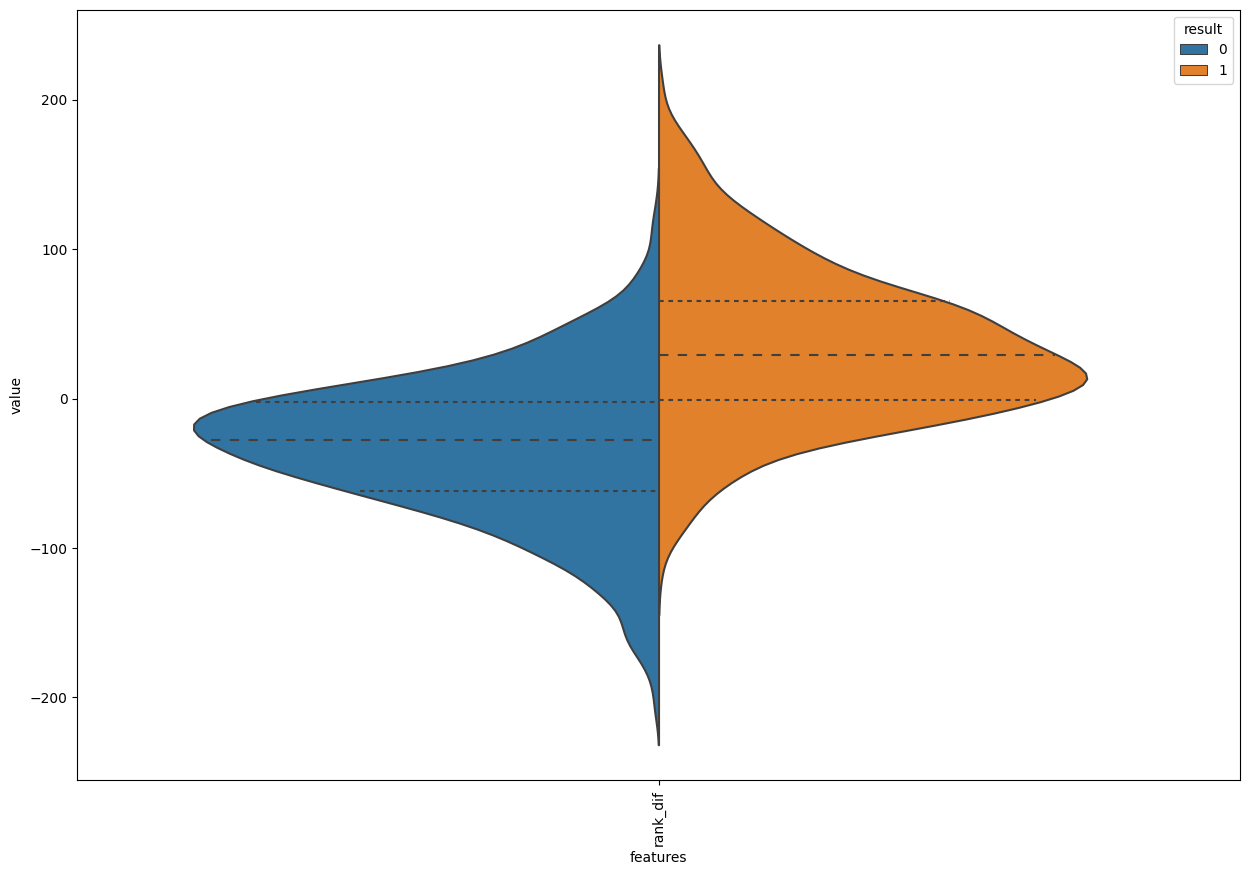

In [8]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_rank_dif,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Nas figuras abaixo para quantidade de gols do time da casa e do time visitante, é possível perceber que as variáveis que consideram apenas os últimos 5, 10 e 15 jogos são muito parecidas, assim como as variáveis que consideram todos os jogos do ciclo da copa e a os últimos 30 jogos da seleção. No entanto, a diferença entre as distribuições dos resultados não é clara.

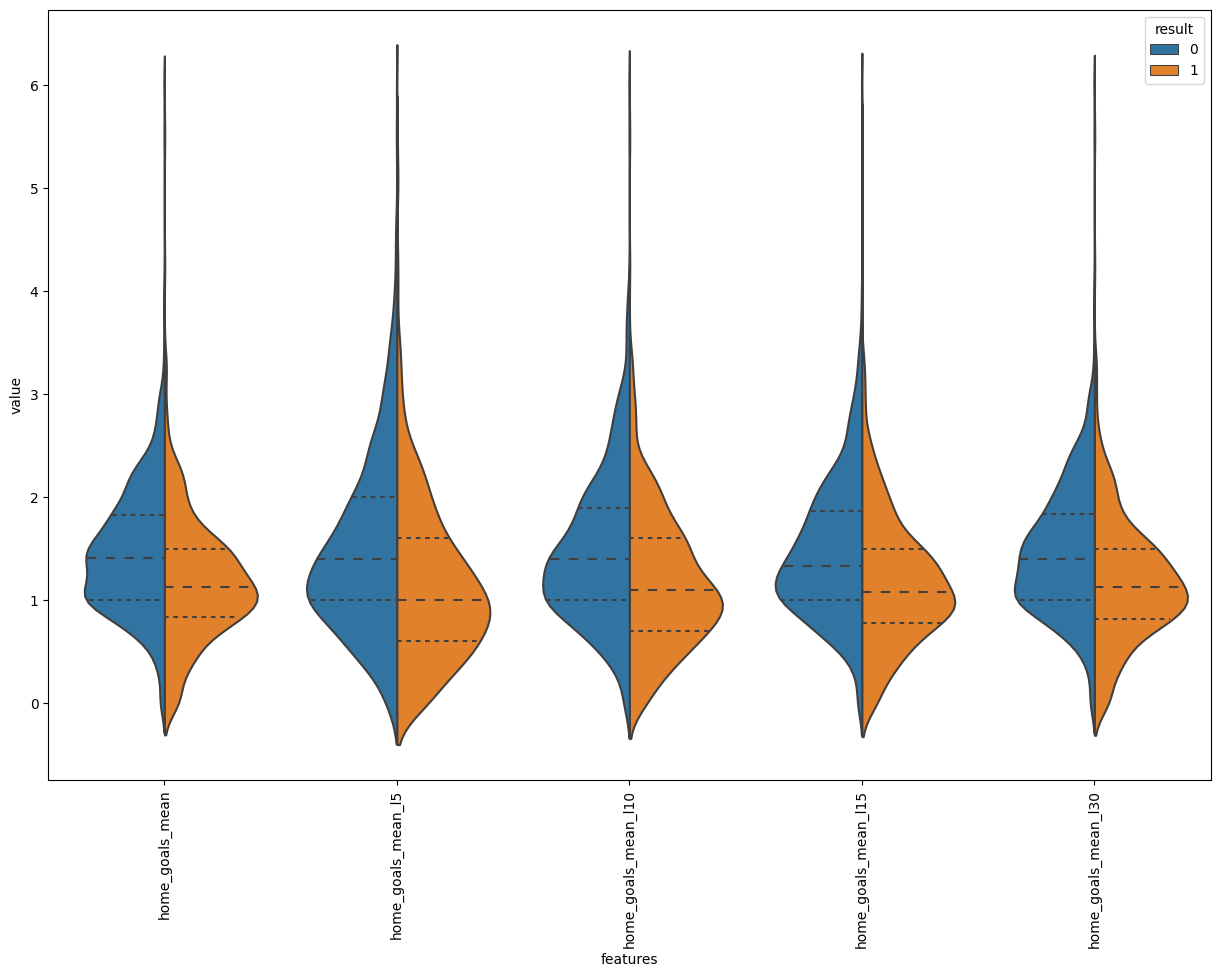

In [9]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_home_goals,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

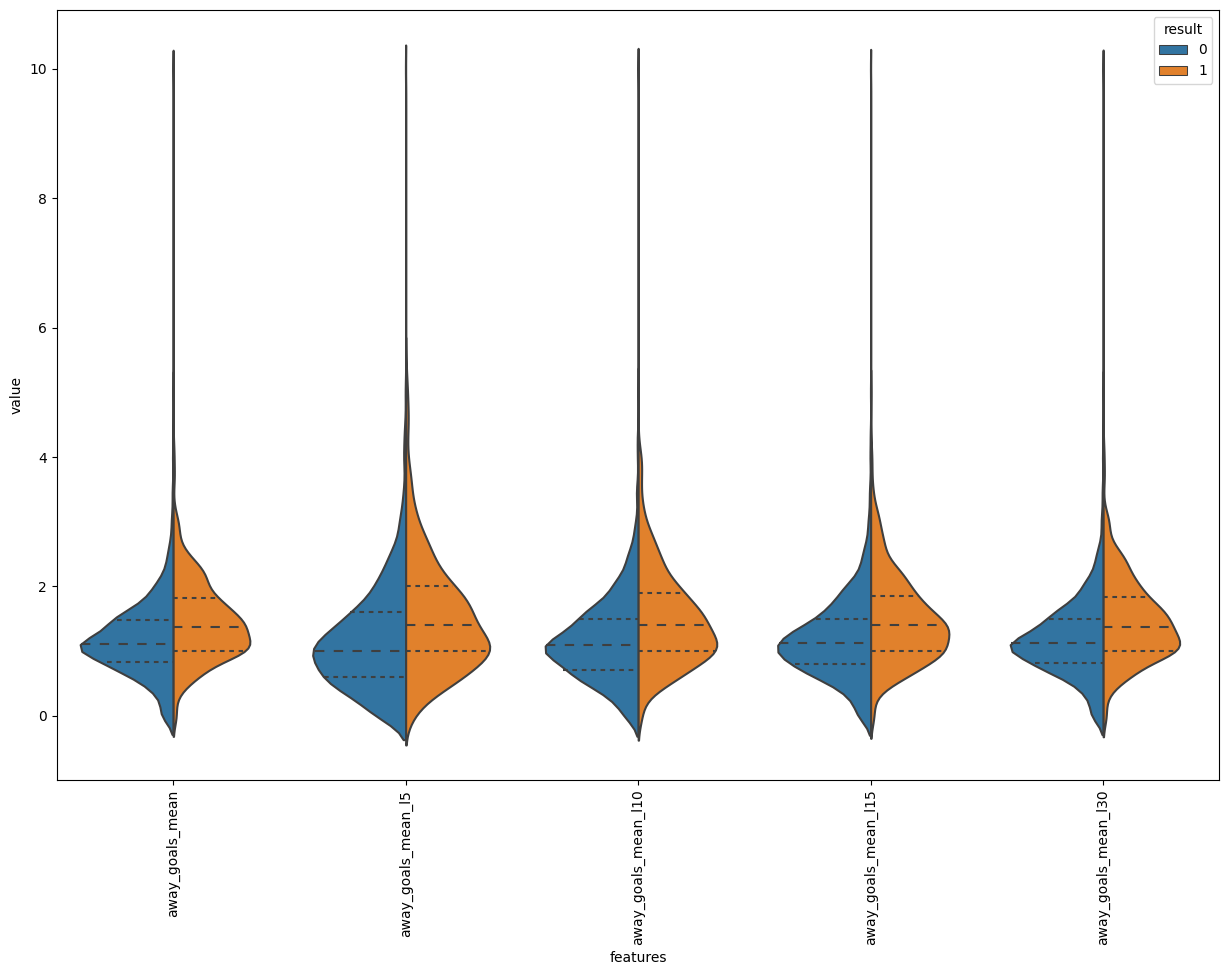

In [10]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_away_goals,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Para os gols sofridos o padrão se mantém, com apenas podendo verificar mais diferenças entre gols nos últimos 5 jogos e no ciclo inteiro.

Nota-se que assim como o gráfico anterior e ao contrário do covariável de diferença de ranking, as médias são estatisticamente "iguais", pois estão dentro do intervalo de confiança para ambas os resultados.

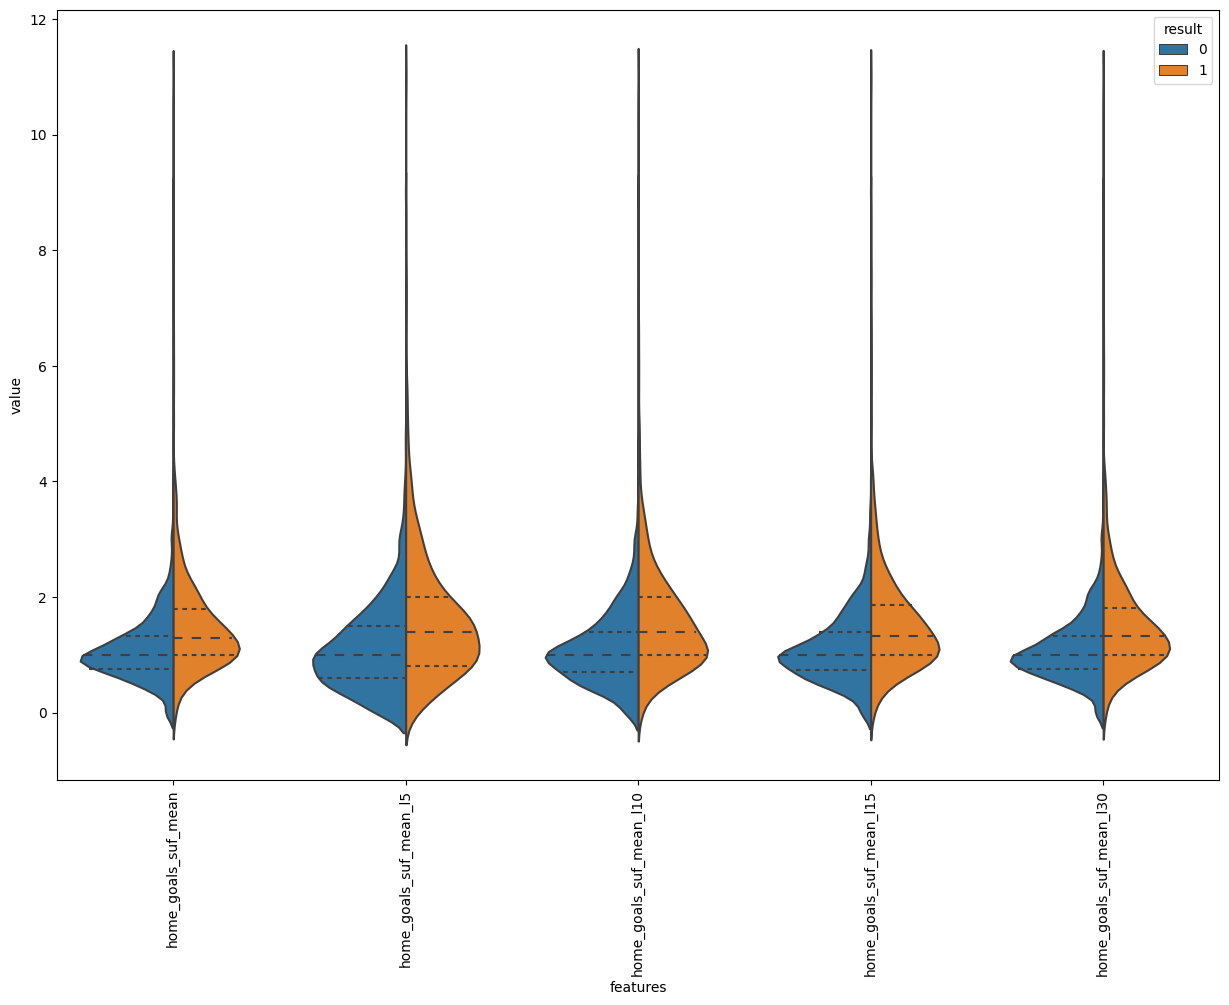

In [11]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_home_suf_goals,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

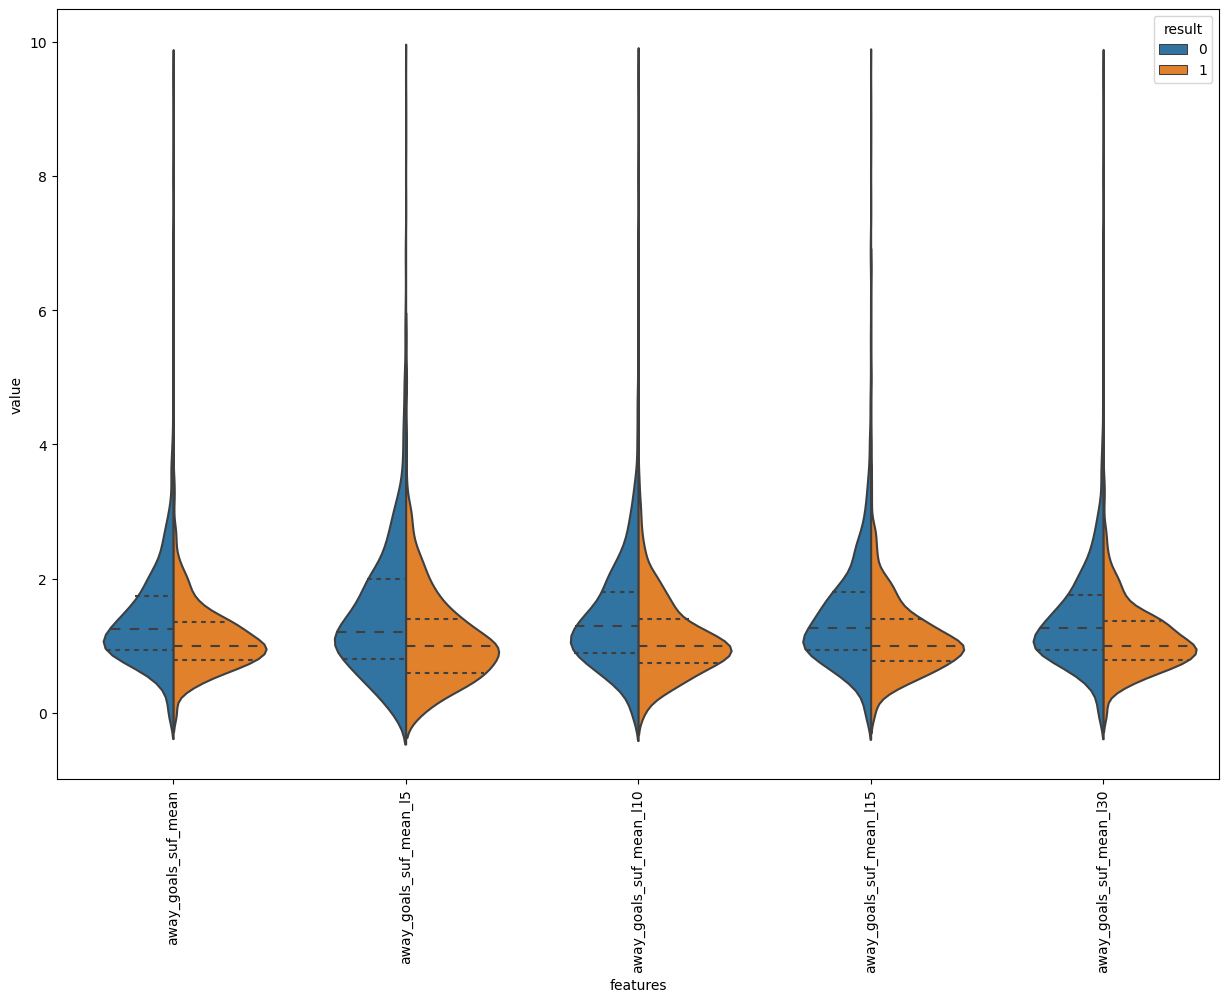

In [12]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_away_suf_goals,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Analisando o ranking das seleções na FIFA, esse padrão fica ainda mais destacado, mostrando que provavelmente a melhor ideia seria ter uma variável para analisar o momento (últimos 5 jogos) e outra para avaliar a constância (ciclo inteiro).

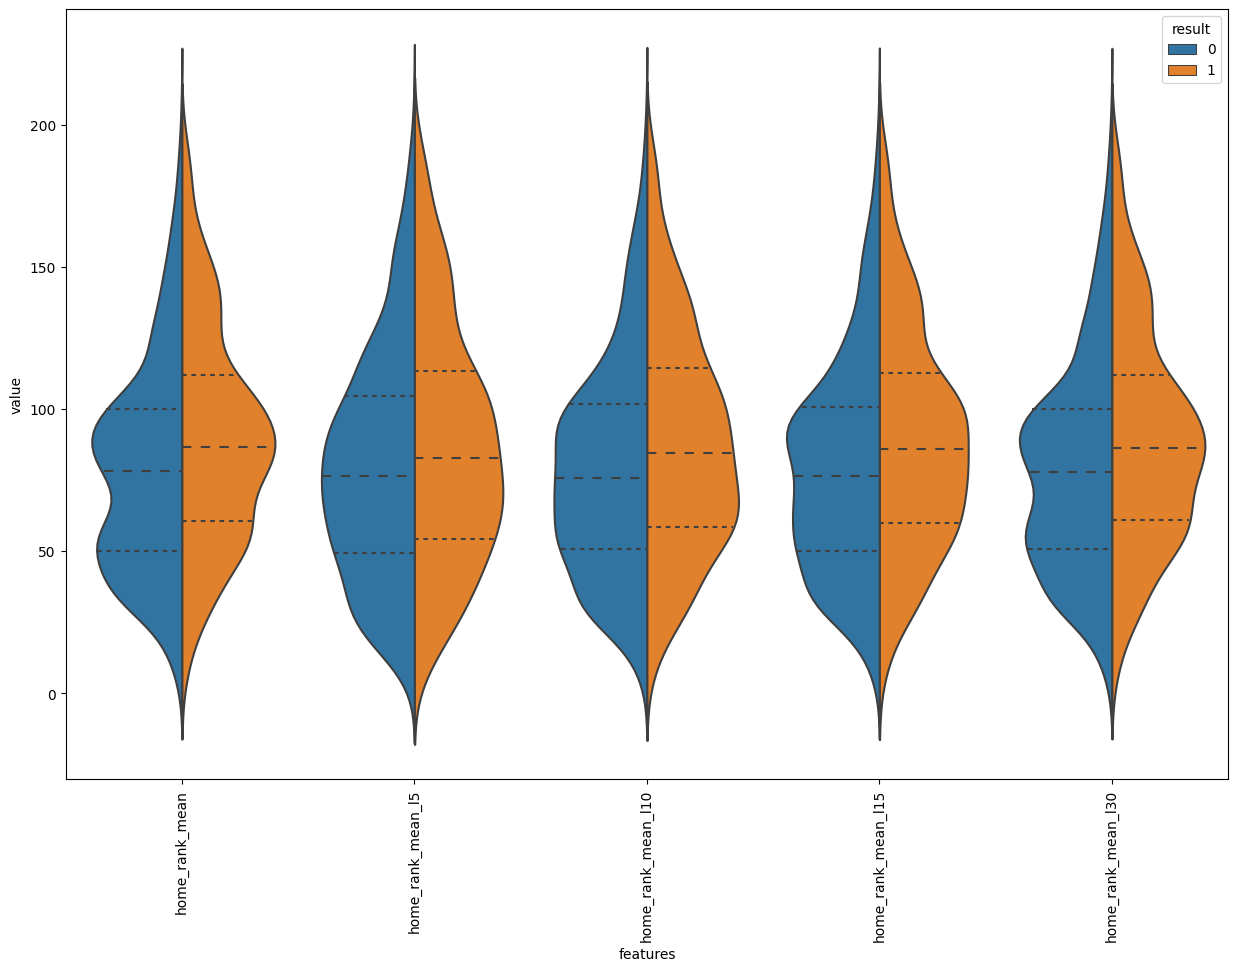

In [13]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_home_rank,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

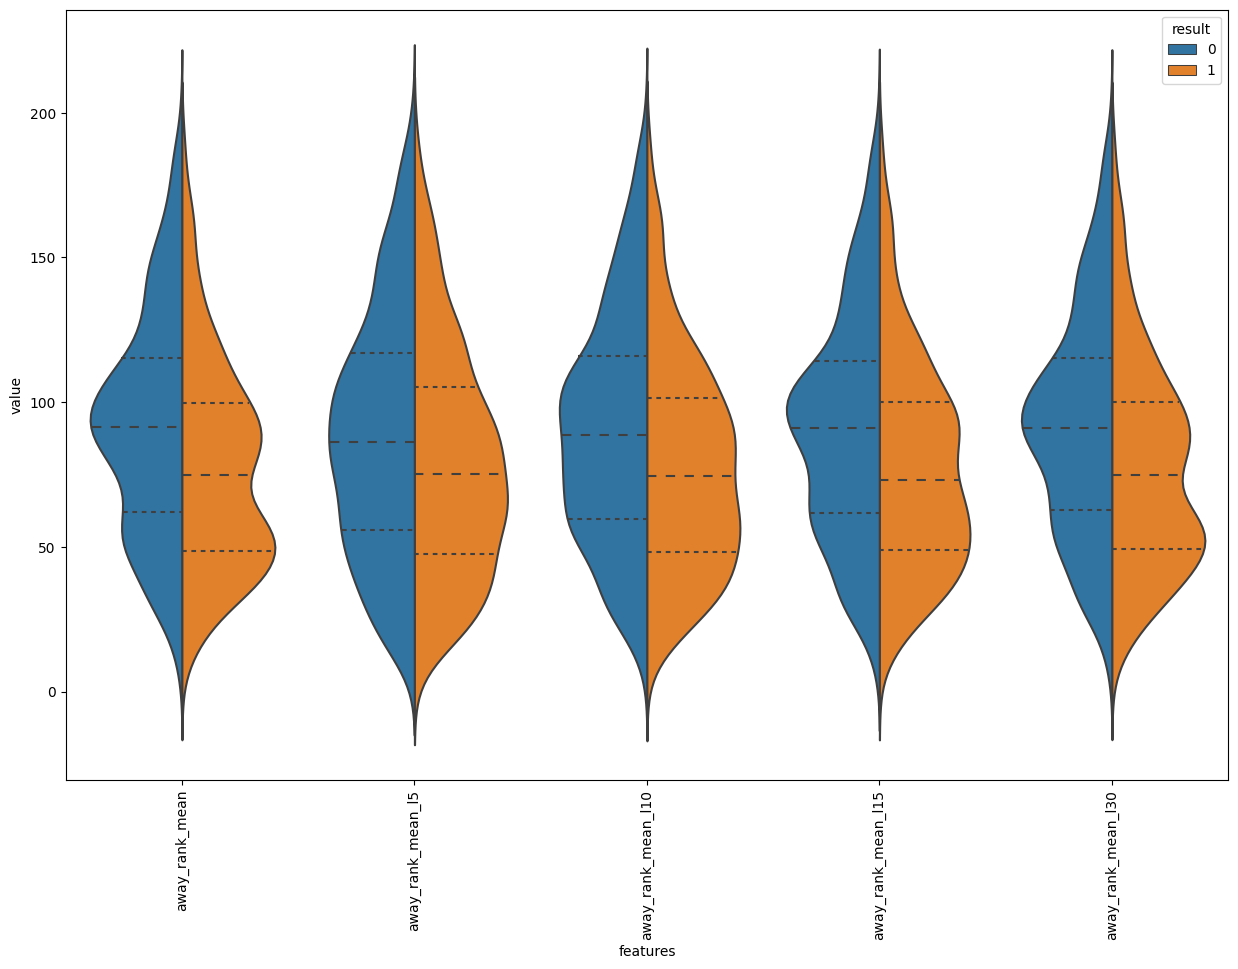

In [14]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_away_rank,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Para a média dos pontos esse padrão tem uma pequena distorção, mas é como se fosse uma evolução saindo dos últimos 5 jogos até chegar nos últimos 30. 

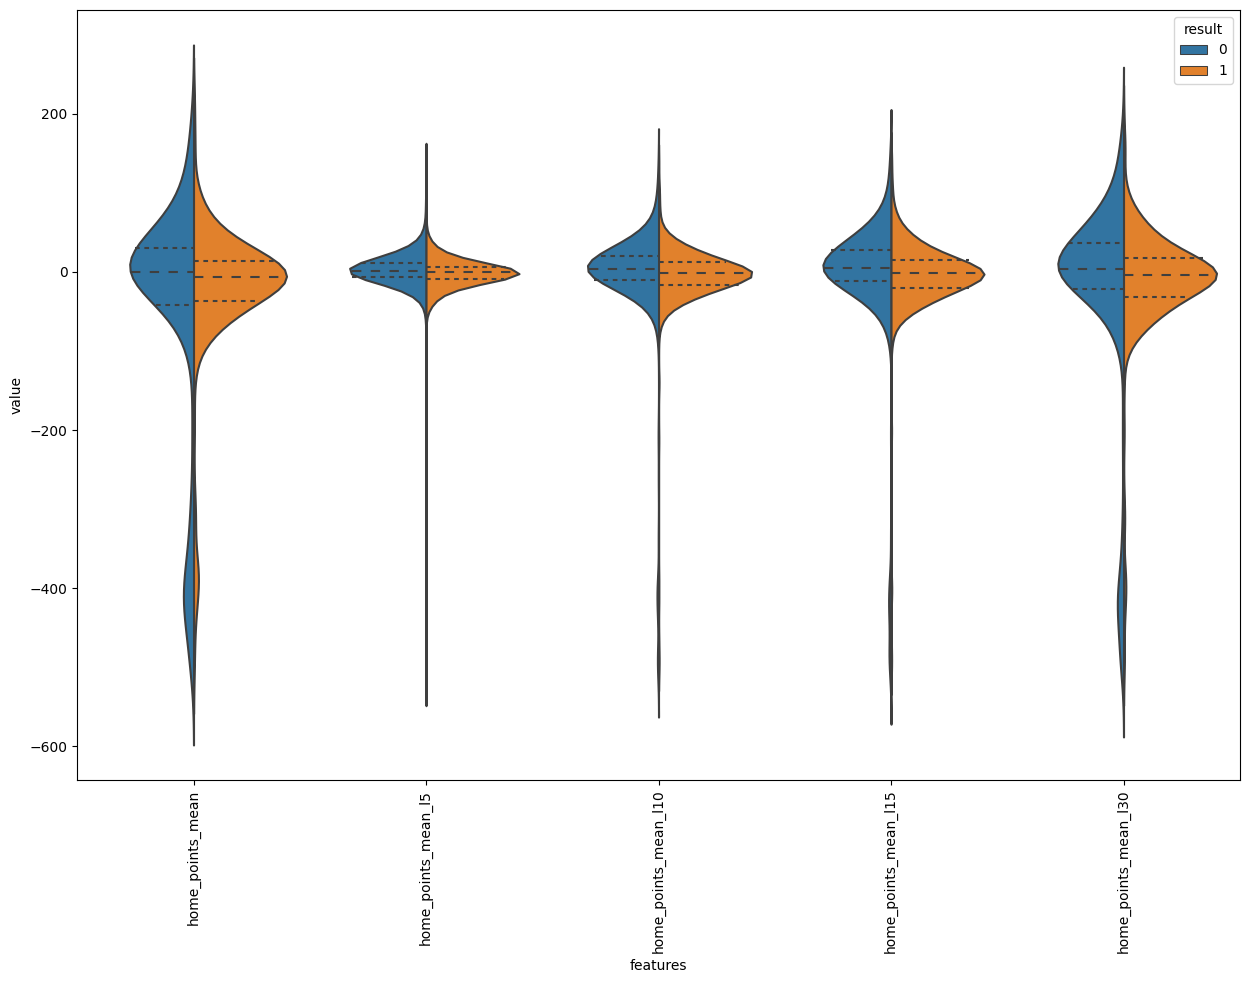

In [15]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_home_points,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

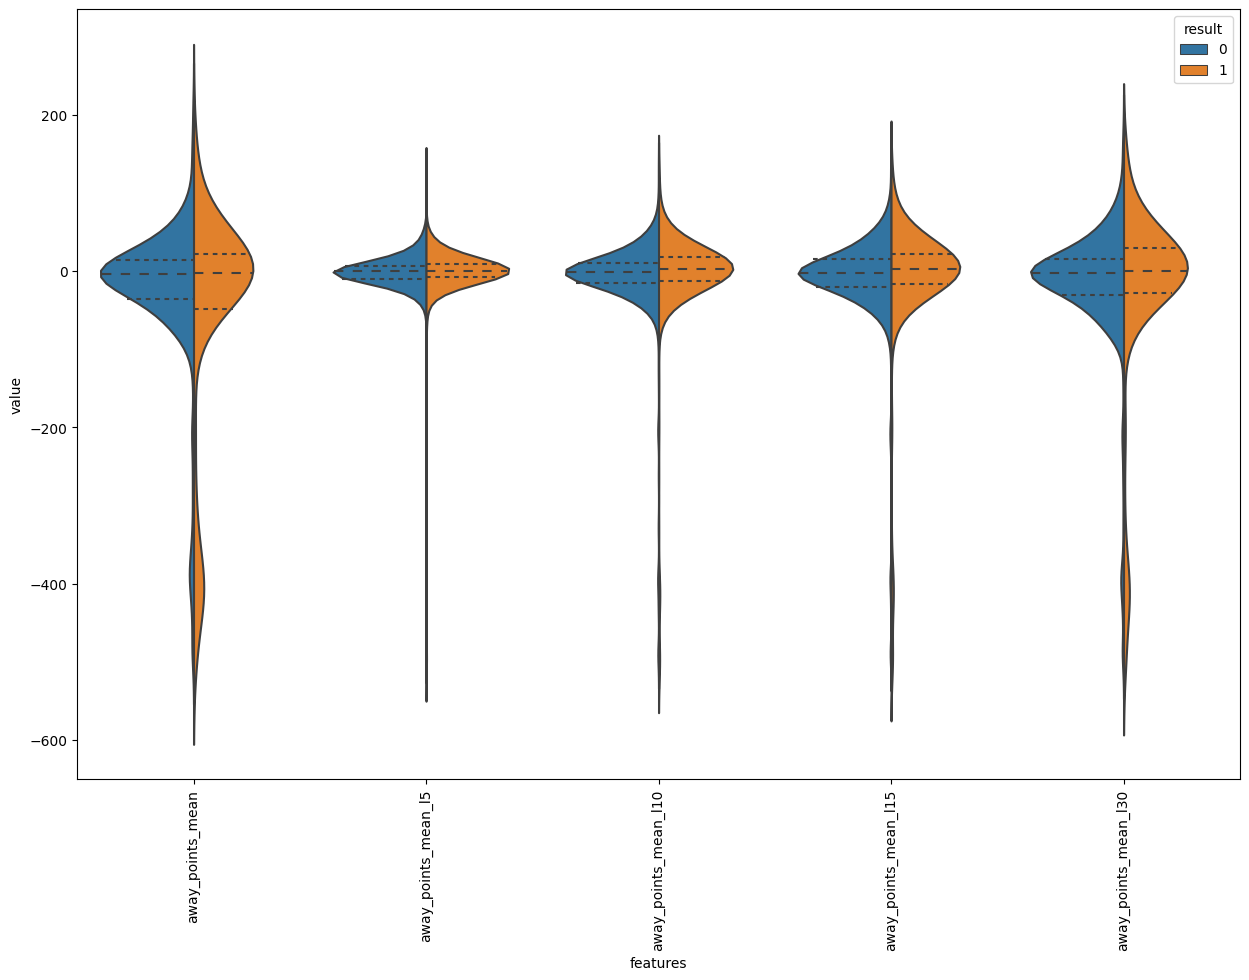

In [16]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_away_points,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Nos pontos por ranking é perceptível apenas que todas as covariáveis são muito semelhantes.

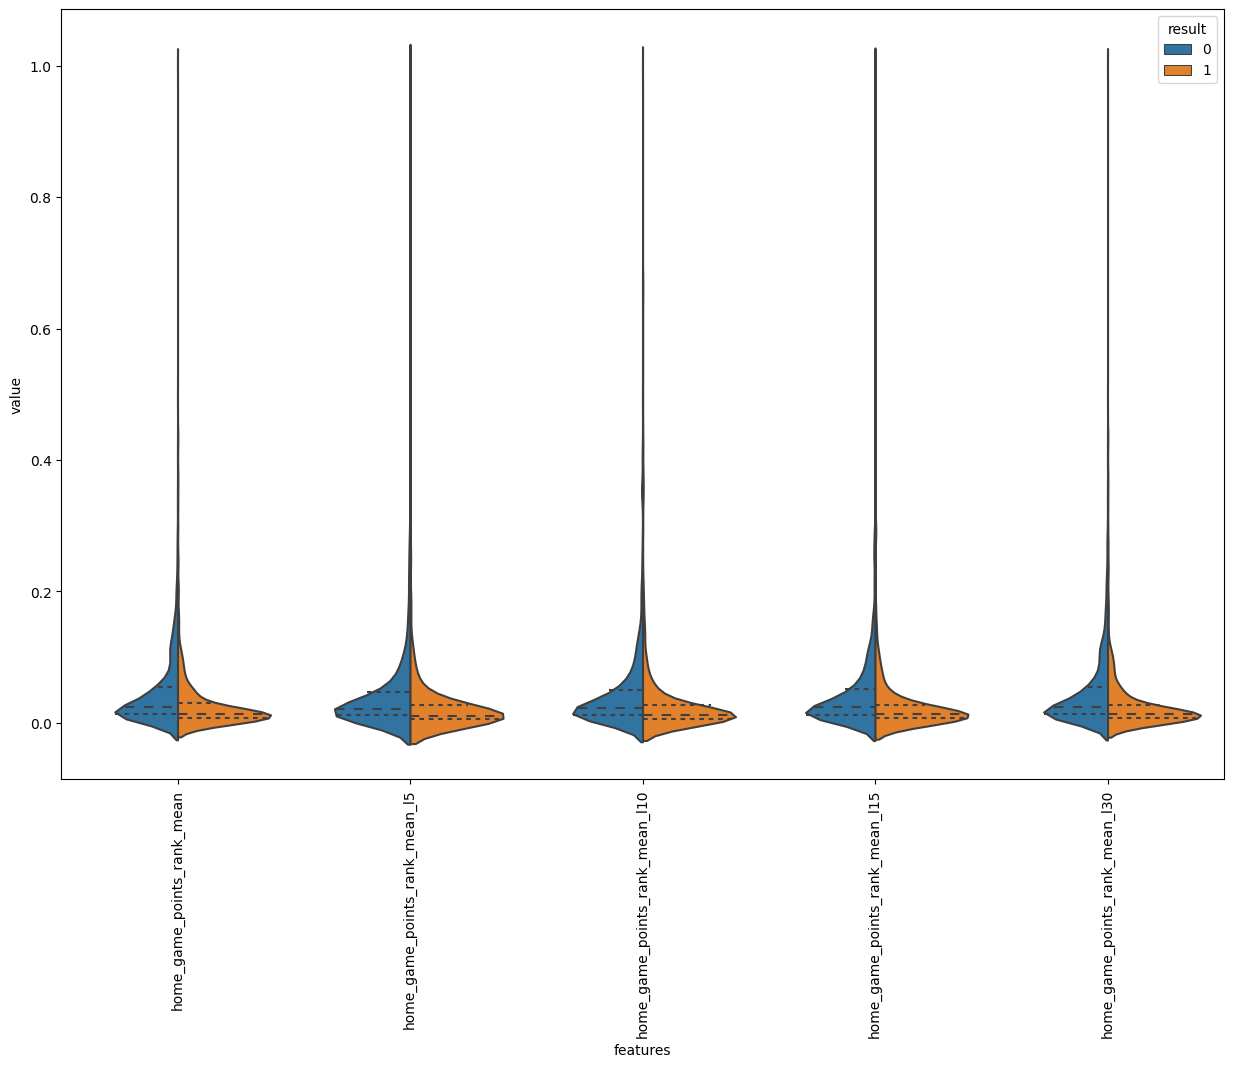

In [17]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_home_game_points_rank,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

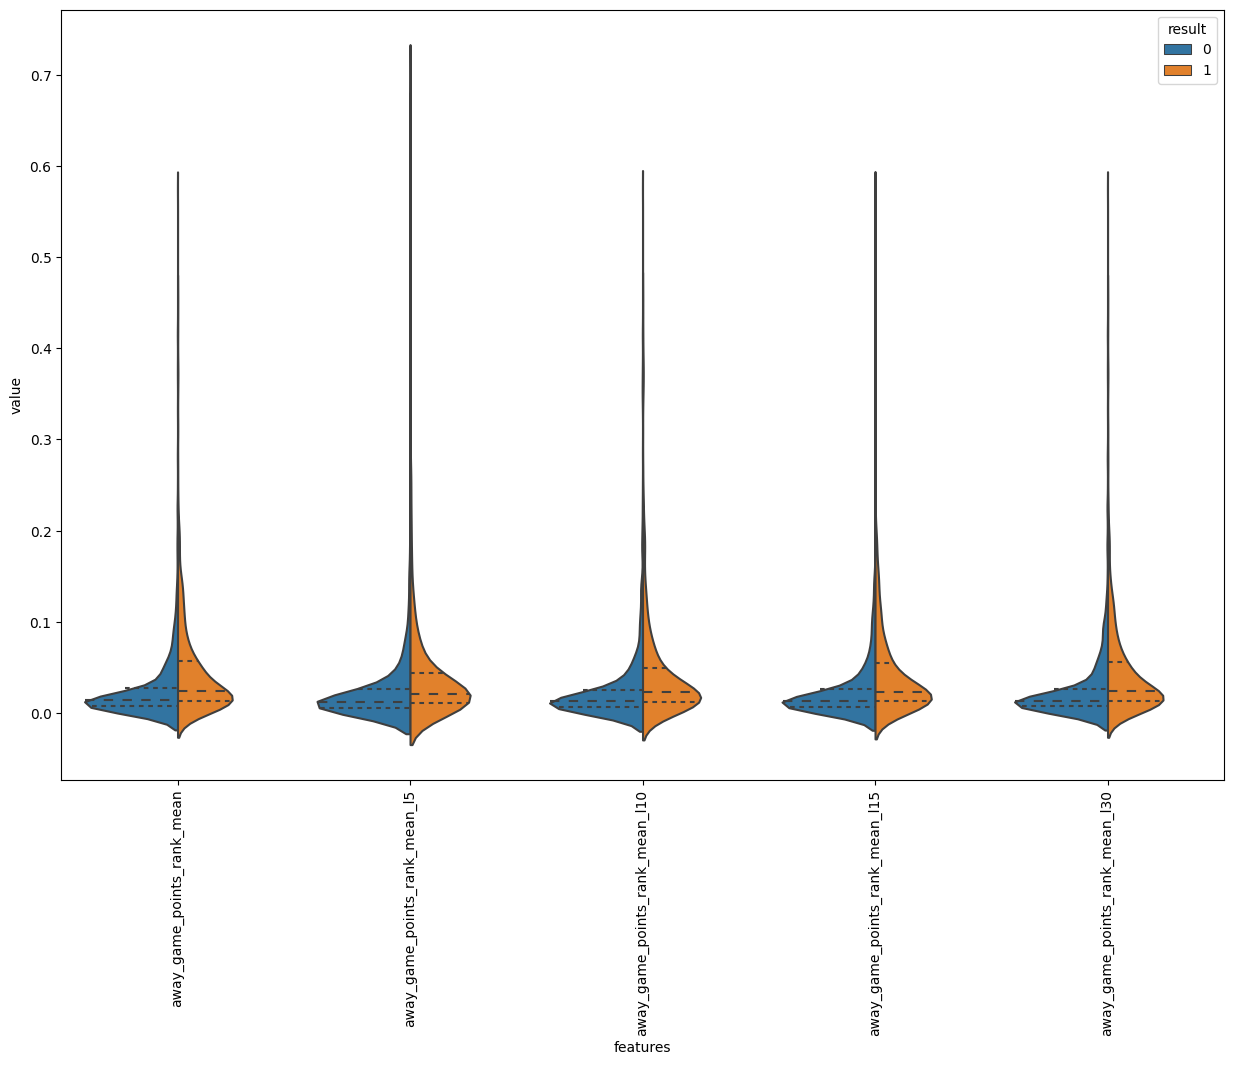

In [18]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_away_game_points_rank,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Na variável ranking por classificação as 5 covariáveis são muito semelhantes, mas também nota-se uma maior aproximação dos últimos 5 jogos para os 10 e 15, que para as outras duas.

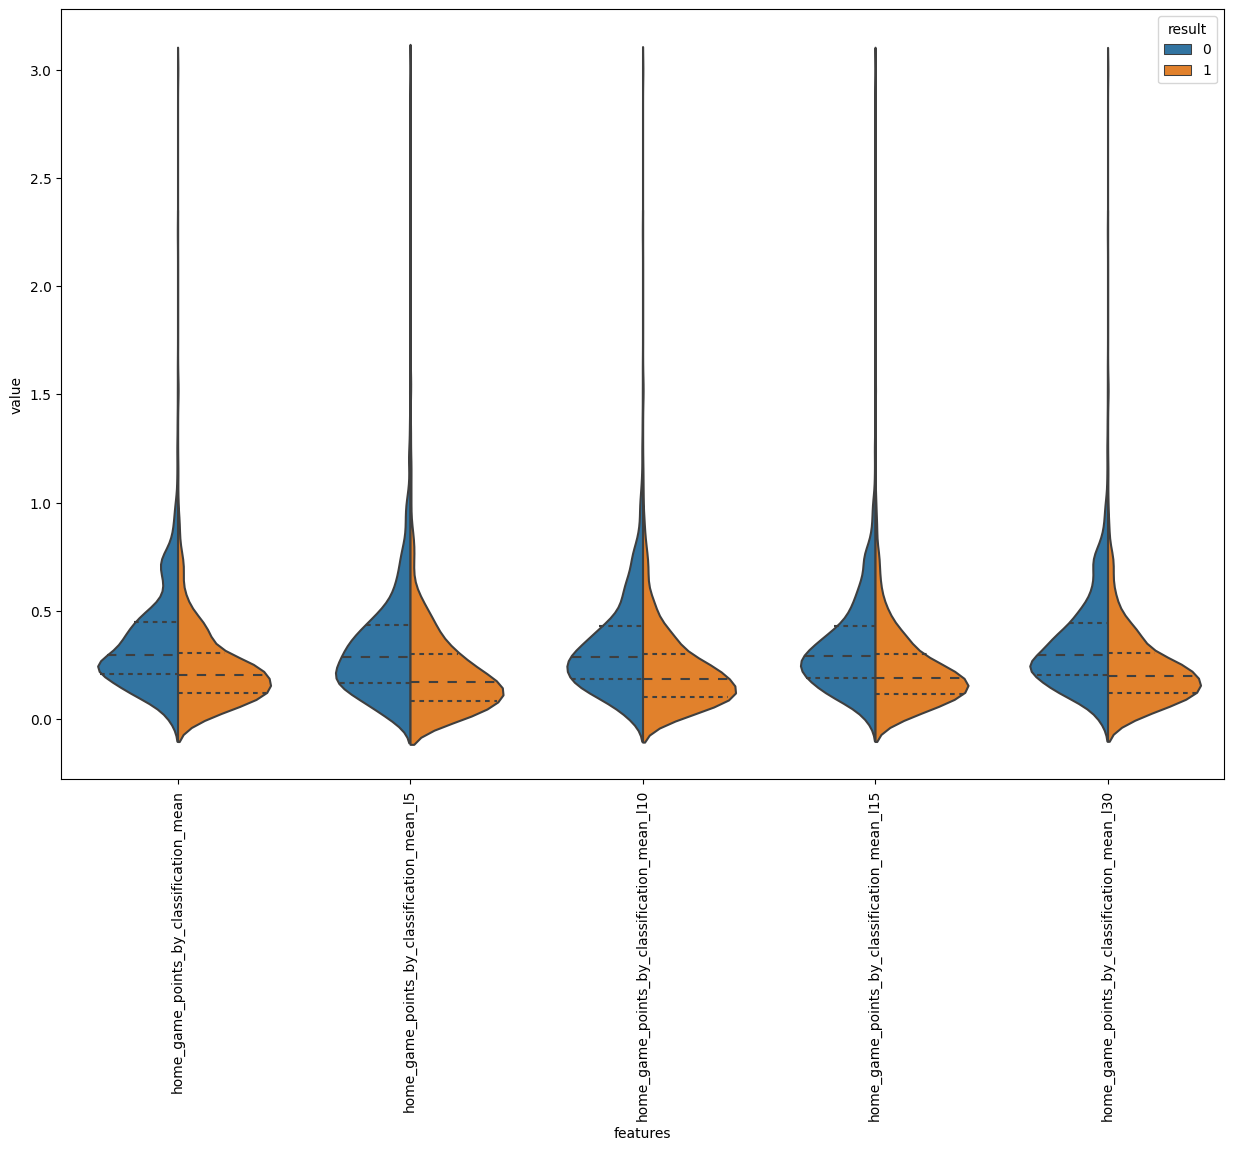

In [19]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_home_game_points_classification,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

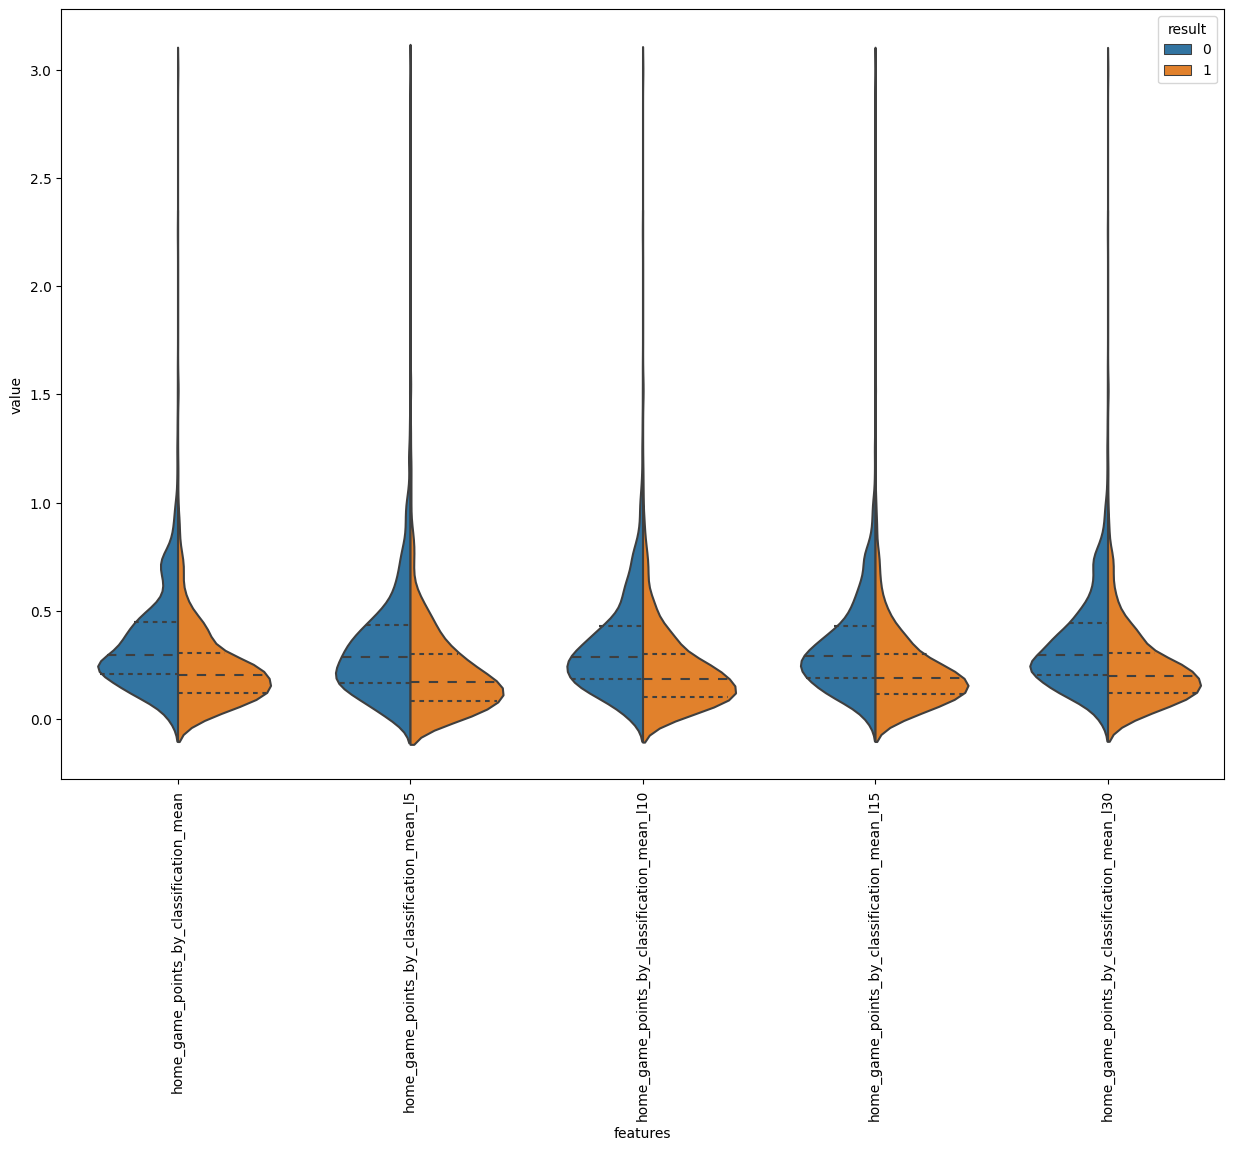

In [20]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=data_home_game_points_classification,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Com os gráfico acima é perceptível, que a diferença de ranking entre as seleções é o único bom separador dos resultados. No entanto, vamos criar novas variáveis para que tenhamos outras variáveis boas para captar a difenreça entre o time visitante e o time da casa.

Descartarei os dados sobre os últimos 10 e 30 jogos, por se assemelharem muito aos dados sobre os últimos 5 e todo o ciclo, respectivamente.

In [21]:
df

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,away_points_mean_l30,away_game_points_mean_l10,away_game_points_mean_l15,away_game_points_mean_l30,away_game_points_rank_mean_l10,away_game_points_rank_mean_l15,away_game_points_rank_mean_l30,away_game_points_by_classification_mean_l10,away_game_points_by_classification_mean_l15,away_game_points_by_classification_mean_l30
0,2018-07-06,Brazil,Belgium,4.0,5.0,1.0,2.0,1,-1.0,1.0,...,0.00,3.000000,3.000000,3.000000,0.073171,0.073171,0.073171,0.750000,0.750000,0.750000
1,2018-07-07,Sweden,England,21.0,7.0,0.0,2.0,1,14.0,-1.0,...,0.00,1.000000,1.000000,1.000000,0.058824,0.058824,0.058824,0.500000,0.500000,0.500000
3,2018-07-10,France,Belgium,2.0,5.0,1.0,0.0,0,-3.0,-2.0,...,0.00,3.000000,3.000000,3.000000,0.411585,0.411585,0.411585,1.875000,1.875000,1.875000
4,2018-07-11,Croatia,England,12.0,7.0,2.0,1.0,0,5.0,-6.0,...,0.00,2.000000,2.000000,2.000000,0.100840,0.100840,0.100840,0.625000,0.625000,0.625000
5,2018-07-14,Belgium,England,5.0,7.0,2.0,0.0,0,-2.0,-1.0,...,0.00,1.333333,1.333333,1.333333,0.067227,0.067227,0.067227,0.416667,0.416667,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,2022-09-27,Republic of Ireland,Armenia,47.0,92.0,3.0,2.0,0,-45.0,0.0,...,12.42,0.600000,0.600000,1.133333,0.010550,0.009423,0.019432,0.125000,0.112222,0.222222
3221,2022-09-27,Norway,Serbia,36.0,25.0,0.0,2.0,1,11.0,0.0,...,64.53,2.200000,2.133333,1.766667,0.090846,0.070955,0.057199,0.554167,0.502778,0.415278
3223,2022-09-27,Kosovo,Cyprus,106.0,108.0,5.0,1.0,0,-2.0,0.0,...,-80.48,1.000000,0.666667,0.600000,0.014185,0.009456,0.008672,0.168333,0.112222,0.103333
3224,2022-09-27,Greece,Northern Ireland,49.0,58.0,3.0,1.0,0,-9.0,1.0,...,-88.90,1.200000,1.266667,1.000000,0.035183,0.031528,0.024201,0.250000,0.233333,0.198889


## Reformulando a base de dados
Para ter menos
 NAS

In [22]:
df = df[['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament',  'rank_home', 'rank_change_home',
       'country_classification_home', 'rank_away', 'rank_change_away',
       'country_classification_away', 'result', 'rank_dif']]

In [23]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.query("team == @team & date < @date").sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    last15 = past_games.head(15)

    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    goals_l15 = last15["score"].mean()

    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    goals_suf_l15 = last15["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    rank_l15 = last15["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
        points_l15 = last15["total_points"].values[0] - last15["total_points"].values[-1]
    else:
        points = 0
        points_l5 = 0
        points_l15 = 0    
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    gp_l15 = last15["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    gp_rank_l15 = last15["points_by_rank"].mean()
    
    cp_rank = past_games["points_by_classification"].mean()
    cp_rank_l5 = last5["points_by_classification"].mean()
    cp_rank_l15 = last15["points_by_classification"].mean()
    
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5, cp_rank, cp_rank_l5,
                    goals_l15, goals_suf_l15, rank_l15, points_l15, gp_l15, gp_rank_l15, cp_rank_l15])

In [24]:
stats_cols = (["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", 
                "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5",
                "game_points_by_classification_mean", "game_points_by_classification_mean_l5",
                "goals_mean_l15", "goals_suf_mean_l15", "rank_mean_l15", "points_mean_l15", "game_points_mean_l15", "game_points_rank_mean_l15",  
                "game_points_by_classification_mean_l15" 
                ])

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

In [25]:
stats_df

,goals_mean,goals_mean_l5,goals_suf_mean,goals_suf_mean_l5,rank_mean,rank_mean_l5,points_mean,points_mean_l5,game_points_mean,game_points_mean_l5,...,game_points_rank_mean_l5,game_points_by_classification_mean,game_points_by_classification_mean_l5,goals_mean_l15,goals_suf_mean_l15,rank_mean_l15,points_mean_l15,game_points_mean_l15,game_points_rank_mean_l15,game_points_by_classification_mean_l15
0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6725,1.800000,2.2,1.111111,1.0,54.533333,42.0,90.53,2.00,1.866667,2.0,...,0.073887,0.418519,0.433333,2.066667,0.866667,49.200000,36.63,2.133333,0.070955,0.502778
6726,1.380952,1.0,1.000000,1.8,76.357143,29.2,-19.52,-5.75,1.404762,1.0,...,0.029545,0.264087,0.250000,1.533333,1.266667,66.133333,2.60,1.400000,0.024263,0.235000
6727,0.767442,0.6,1.767442,1.4,70.418605,63.8,-99.48,-5.57,0.767442,1.0,...,0.019652,0.130620,0.216667,0.533333,2.066667,73.066667,-60.26,0.666667,0.009456,0.112222
6728,1.023256,1.2,1.279070,1.4,57.906977,95.6,-92.90,-24.45,1.139535,1.0,...,0.009470,0.214341,0.125000,1.066667,1.000000,74.533333,-26.64,1.266667,0.031528,0.233333


In [26]:
team_stats

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points,country_classification,points_by_classification
0,2018-07-01,Russia,1.0,1.0,49.0,6.0,-12.0,1758.00,2,43.0,0.166667,1,6,1.00
1,2018-07-01,Croatia,1.0,1.0,12.0,15.0,-6.0,2036.00,2,-3.0,0.066667,1,2,0.50
2,2018-07-02,Brazil,2.0,0.0,4.0,10.0,1.0,2160.00,0,-6.0,0.300000,3,1,1.50
3,2018-07-02,Belgium,3.0,2.0,5.0,41.0,-1.0,2124.00,0,-36.0,0.073171,3,1,0.75
4,2018-07-03,Sweden,1.0,0.0,21.0,8.0,-1.0,1955.00,0,13.0,0.375000,3,4,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6725,2022-09-27,Serbia,2.0,0.0,25.0,36.0,0.0,1549.53,1,11.0,0.083333,3,4,0.75
6726,2022-09-27,Slovenia,1.0,1.0,65.0,20.0,0.0,1372.48,2,-45.0,0.050000,1,6,0.25
6727,2022-09-27,Cyprus,1.0,5.0,108.0,106.0,1.0,1180.52,0,-2.0,0.000000,0,8,0.00
6728,2022-09-27,Northern Ireland,1.0,3.0,58.0,49.0,0.0,1399.10,0,-9.0,0.000000,0,6,0.00


In [27]:
full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [28]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [29]:
home_team_stats.columns[-21:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5', 'game_points_by_classification_mean',
       'game_points_by_classification_mean_l5', 'goals_mean_l15',
       'goals_suf_mean_l15', 'rank_mean_l15', 'points_mean_l15',
       'game_points_mean_l15', 'game_points_rank_mean_l15',
       'game_points_by_classification_mean_l15'],
      dtype='object')

In [30]:
home_team_stats = home_team_stats[home_team_stats.columns[-21:]]
away_team_stats = away_team_stats[away_team_stats.columns[-21:]]

In [31]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [32]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [33]:
match_stats

,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,home_game_points_mean,home_game_points_mean_l5,...,away_game_points_rank_mean_l5,away_game_points_by_classification_mean,away_game_points_by_classification_mean_l5,away_goals_mean_l15,away_goals_suf_mean_l15,away_rank_mean_l15,away_points_mean_l15,away_game_points_mean_l15,away_game_points_rank_mean_l15,away_game_points_by_classification_mean_l15
0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,1.761905,1.4,0.880952,1.0,63.547619,38.6,82.57,25.07,1.833333,2.0,...,0.073887,0.418519,0.433333,2.066667,0.866667,49.200000,36.63,2.133333,0.070955,0.502778
3361,1.377358,1.2,1.132075,2.0,49.603774,39.4,-391.56,-21.33,1.603774,0.6,...,0.029545,0.264087,0.250000,1.533333,1.266667,66.133333,2.60,1.400000,0.024263,0.235000
3362,1.434783,1.2,1.304348,1.4,77.456522,65.4,103.90,10.00,1.326087,1.2,...,0.019652,0.130620,0.216667,0.533333,2.066667,73.066667,-60.26,0.666667,0.009456,0.112222
3363,1.090909,1.4,0.909091,0.2,73.931818,96.2,5.45,20.02,1.590909,2.4,...,0.009470,0.214341,0.125000,1.066667,1.000000,74.533333,-26.64,1.266667,0.031528,0.233333


In [34]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [35]:
full_df['away_goals_suf_mean']

0            NaN
1            NaN
3            NaN
4            NaN
5            NaN
          ...   
3360    1.111111
3361    1.000000
3362    1.767442
3363    1.279070
3364    1.857143
Name: away_goals_suf_mean, Length: 3365, dtype: float64

In [36]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [37]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [38]:
full_df['home_goals_suf_mean']

0            NaN
1            NaN
3            NaN
4            NaN
5            NaN
          ...   
3360    0.880952
3361    1.132075
3362    1.304348
3363    0.909091
3364    1.210526
Name: home_goals_suf_mean, Length: 3365, dtype: float64

In [39]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 
        'country_classification_home', 'country_classification_away',
       'home_goals_mean', 'home_goals_mean_l5',  'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5', 'home_game_points_by_classification_mean',
       'home_game_points_by_classification_mean_l5',
       'away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5', 'away_game_points_by_classification_mean',
       'away_game_points_by_classification_mean_l5',
       'is_friendly_0', 'is_friendly_1',
       'home_goals_mean_l15', 
       'home_goals_suf_mean_l15', 'home_rank_mean_l15', 'home_points_mean_l15',
        'home_game_points_mean_l15',
       'home_game_points_rank_mean_l15', 
       'home_game_points_by_classification_mean_l15',
       'away_goals_mean_l15', 'away_goals_suf_mean_l15', 'away_rank_mean_l15', 
        'away_points_mean_l15', 'away_game_points_mean_l15',
       'away_game_points_rank_mean_l15', 
       'away_game_points_by_classification_mean_l15'
       ]]


In [40]:
base_df_no_fg = base_df.dropna()

In [41]:
base_df_no_fg

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean_l15,home_game_points_rank_mean_l15,home_game_points_by_classification_mean_l15,away_goals_mean_l15,away_goals_suf_mean_l15,away_rank_mean_l15,away_points_mean_l15,away_game_points_mean_l15,away_game_points_rank_mean_l15,away_game_points_by_classification_mean_l15
10,2018-08-29,Barbados,Cuba,160.0,181.0,0.0,2.0,1.0,-21.0,0.0,...,1.000000,0.166667,1.000000,1.000000,1.000000,15.000000,0.00,1.000000,0.066667,0.500000
13,2018-09-06,Nepal,Bhutan,161.0,183.0,4.0,0.0,0.0,-22.0,0.0,...,2.000000,0.274390,1.250000,1.333333,1.000000,16.666667,0.00,1.333333,0.067227,0.416667
14,2018-09-06,Bangladesh,Pakistan,194.0,201.0,1.0,0.0,0.0,-7.0,0.0,...,3.000000,0.407143,2.250000,1.666667,1.333333,23.666667,0.00,1.666667,0.171882,1.222222
21,2018-09-09,Denmark,Wales,9.0,19.0,2.0,0.0,0.0,-10.0,-3.0,...,3.000000,0.017857,0.300000,0.000000,3.000000,133.000000,0.00,0.000000,0.000000,0.000000
22,2018-09-09,Bulgaria,Norway,47.0,53.0,1.0,0.0,0.0,-6.0,-2.0,...,0.000000,0.000000,0.000000,5.000000,1.000000,168.000000,0.00,3.000000,0.017857,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,2022-09-27,Republic of Ireland,Armenia,47.0,92.0,3.0,2.0,0.0,-45.0,0.0,...,2.133333,0.095046,0.523333,1.200000,1.000000,32.066667,81.25,1.333333,0.269850,0.597222
3221,2022-09-27,Norway,Serbia,36.0,25.0,0.0,2.0,1.0,11.0,0.0,...,0.866667,0.019590,0.195556,1.133333,1.200000,58.400000,31.23,1.600000,0.058642,0.381667
3223,2022-09-27,Kosovo,Cyprus,106.0,108.0,5.0,1.0,0.0,-2.0,0.0,...,1.200000,0.037785,0.258333,0.800000,1.000000,45.600000,-3.95,1.200000,0.035458,0.255556
3224,2022-09-27,Greece,Northern Ireland,49.0,58.0,3.0,1.0,0.0,-9.0,1.0,...,1.200000,0.014507,0.173333,0.866667,1.333333,64.533333,-27.21,0.933333,0.019421,0.189444


In [42]:
df = base_df_no_fg

In [43]:
df = df.query("result != 2")

In [44]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_dif_l15"] = dif["home_goals_mean_l15"] - dif["away_goals_mean_l15"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_dif_l15"] = dif["home_goals_suf_mean_l15"] - dif["away_goals_suf_mean_l15"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif_l15"] = dif["home_goals_mean_l15"] - dif["away_goals_suf_mean_l15"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_made_dif_l15"] = dif["home_goals_suf_mean_l15"] - dif["away_goals_mean_l15"]

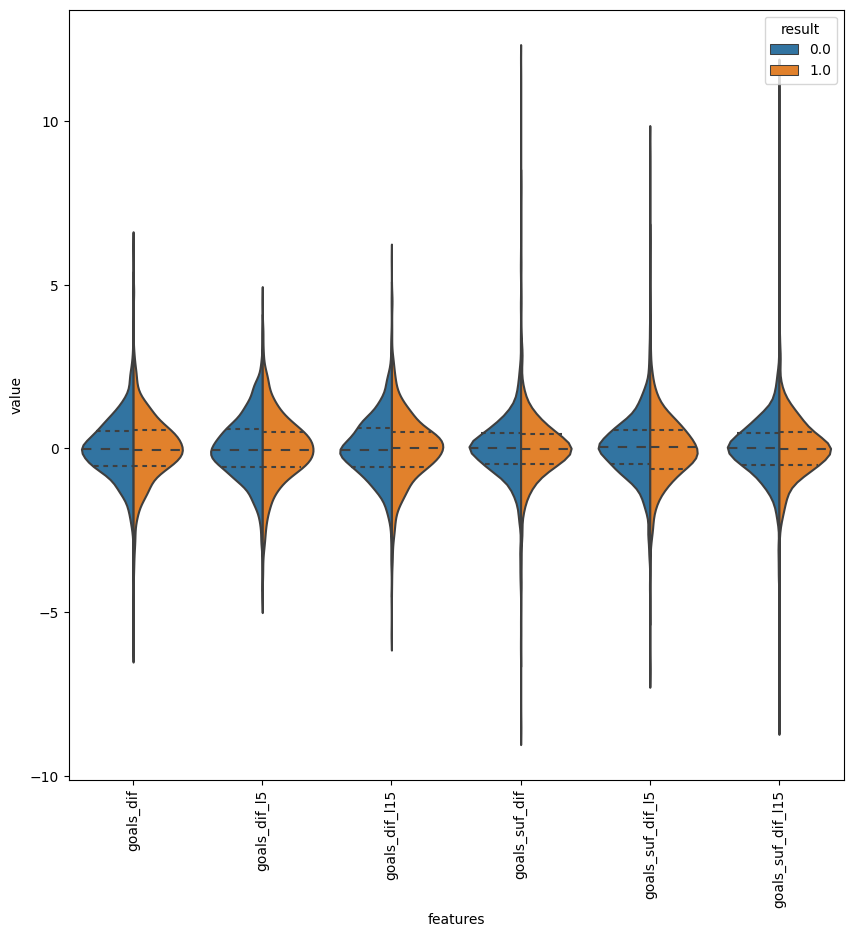

In [45]:
data_difs = dif.iloc[:, -12:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["result"] = dif["result"]
violin = pd.melt(scaled,id_vars="result", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="result", data=violin.iloc[:int(len(violin)/2), :],split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

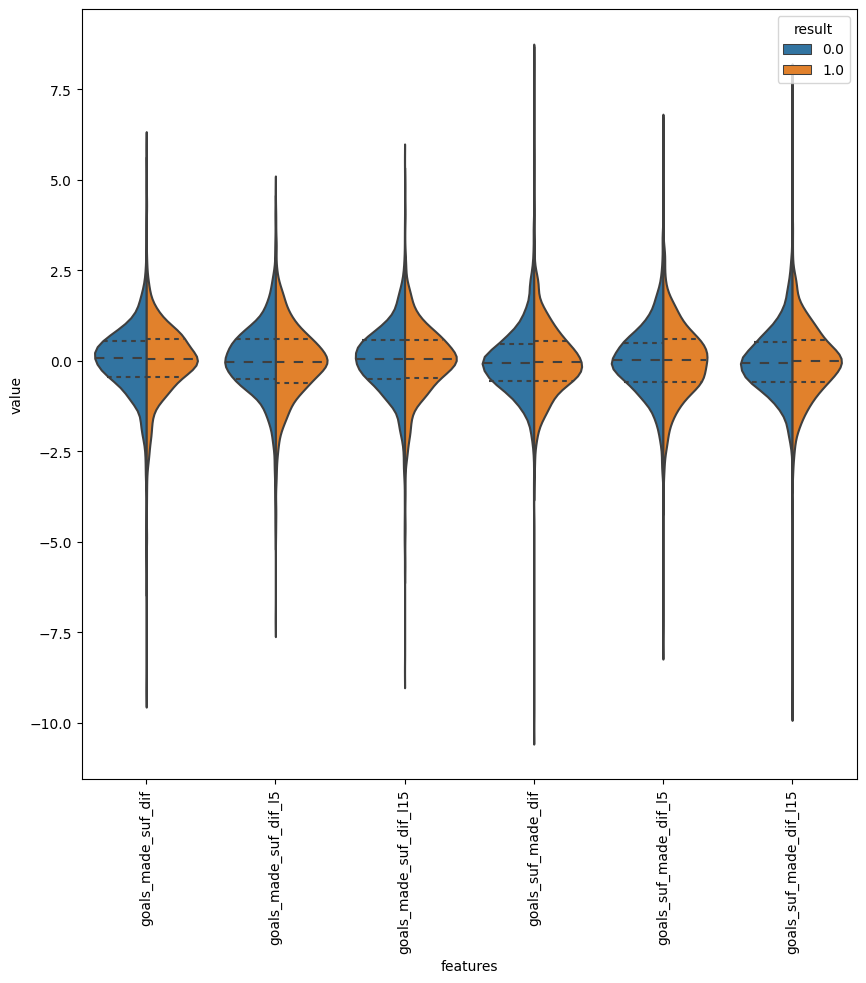

In [46]:
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="result", data=violin.iloc[int(len(violin)/2):, :],split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Com a Figura 1 podemos notar mais variáveis com diferenças, como: goals_dif e goals_suf_dif, ainda não extremamente significante quanto rank_dif.

No entanto, a diferença entre gols feitos e sofridos ou o inverso, tem distribuições extremamente parecidas.

Assim, nós temos 7 covariáveis:
- rank_dif
- goals_dif
- goals_dif_l5
- goals_dif_l15
- goals_suf_dif
- goals_suf_dif_l5
- goals_suf_dif_l15

Nós podemos criar novas variáveis baseadas nos pontos feitos, nos pontos feitos por ranking e classificação.

In [47]:
dif.shape

(2366, 69)

In [48]:
dif.loc[:, "dif_classification_rank"] = dif["home_game_points_by_classification_mean"] - dif["away_game_points_by_classification_mean"]
dif.loc[:, "dif_classification_rank_l5"] = dif["home_game_points_by_classification_mean_l5"] - dif["away_game_points_by_classification_mean_l5"]
dif.loc[:, "dif_classification_rank_l15"] = dif["home_game_points_by_classification_mean_l15"] - dif["away_game_points_by_classification_mean_l15"]
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]
dif.loc[:, "dif_rank_agst_l15"] = dif["home_rank_mean_l15"] - dif["away_rank_mean_l15"]

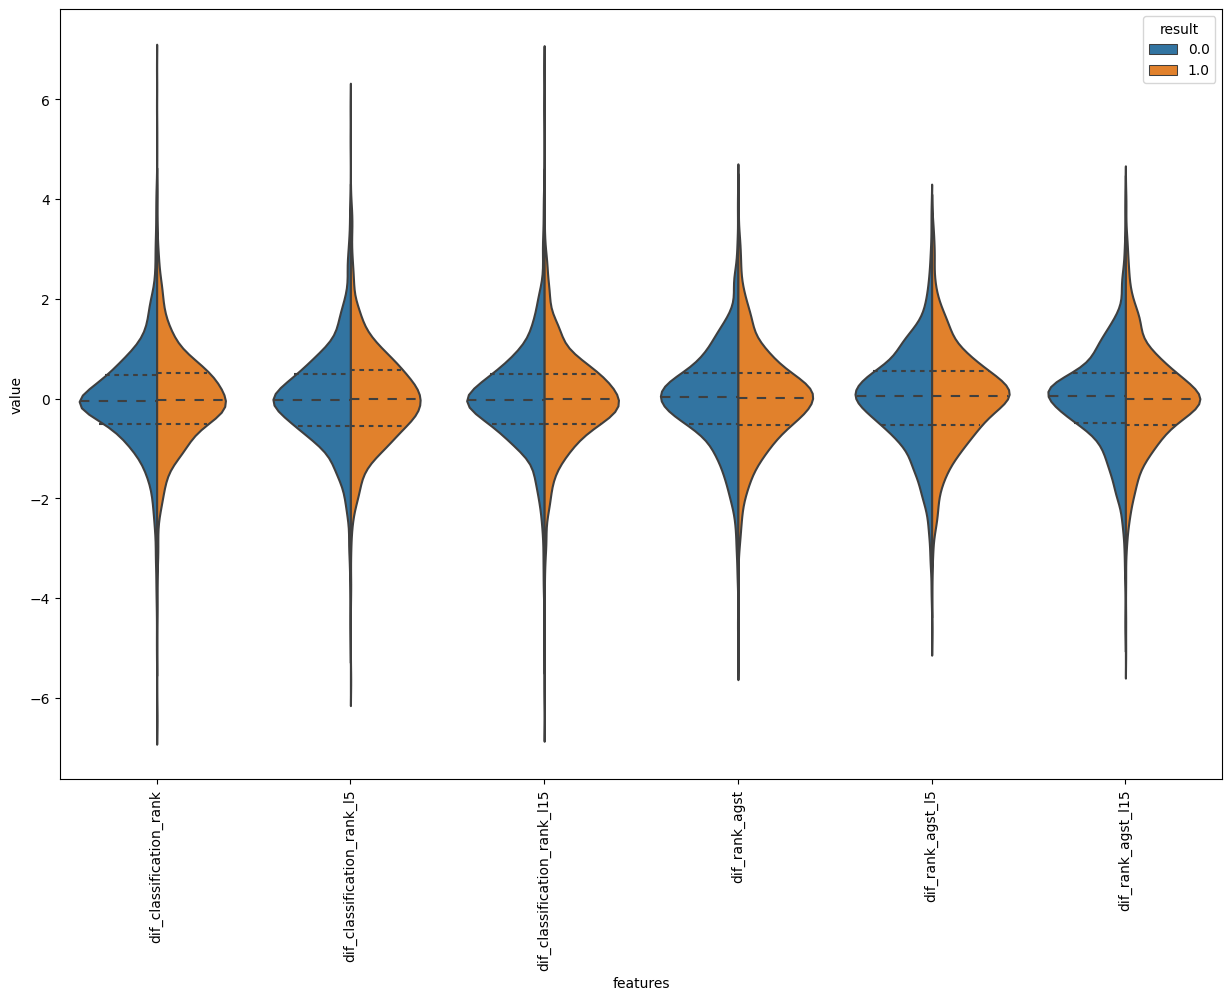

In [49]:
data_difs = dif.iloc[:, -6:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["result"] = df["result"]
violin = pd.melt(scaled,id_vars="result", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

As variáveis tem comportamento muito semelhantes, apesar do recorte de tempo diferente. 

No entanto, a variável resposta (resultado) tem distribuição com uma boa diferença. 

In [50]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_l15"] = dif["home_game_points_mean_l15"] - dif["away_game_points_mean_l15"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]
dif.loc[:, "dif_points_rank_l15"] = dif["home_game_points_rank_mean_l15"] - dif["away_game_points_rank_mean_l15"]

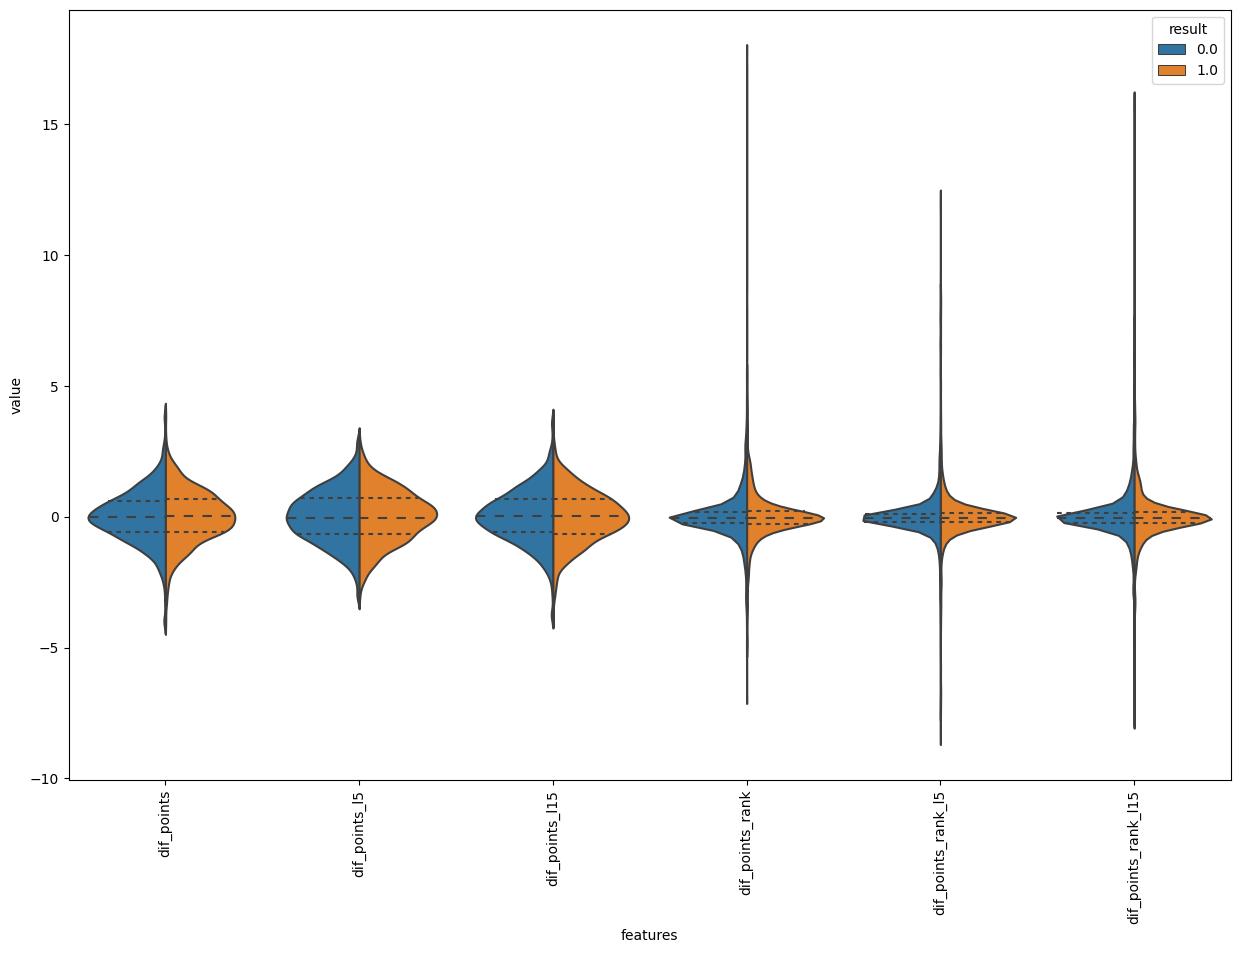

In [51]:
data_difs = dif.iloc[:, -6:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["result"] = df["result"]
violin = pd.melt(scaled,id_vars="result", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Assim como no exemplo anterior as variáveis tem distribuição parecida, no entanto, o resultado tem distribuição razoavelmente diferente.

Também é possível analisarmos gols feitos e sofridos por ranking e verificar a diferença.

In [52]:
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l15"] = (dif["home_goals_mean_l15"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l15"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l15"] = (dif["home_goals_suf_mean_l15"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l15"] / dif["away_rank_mean"])

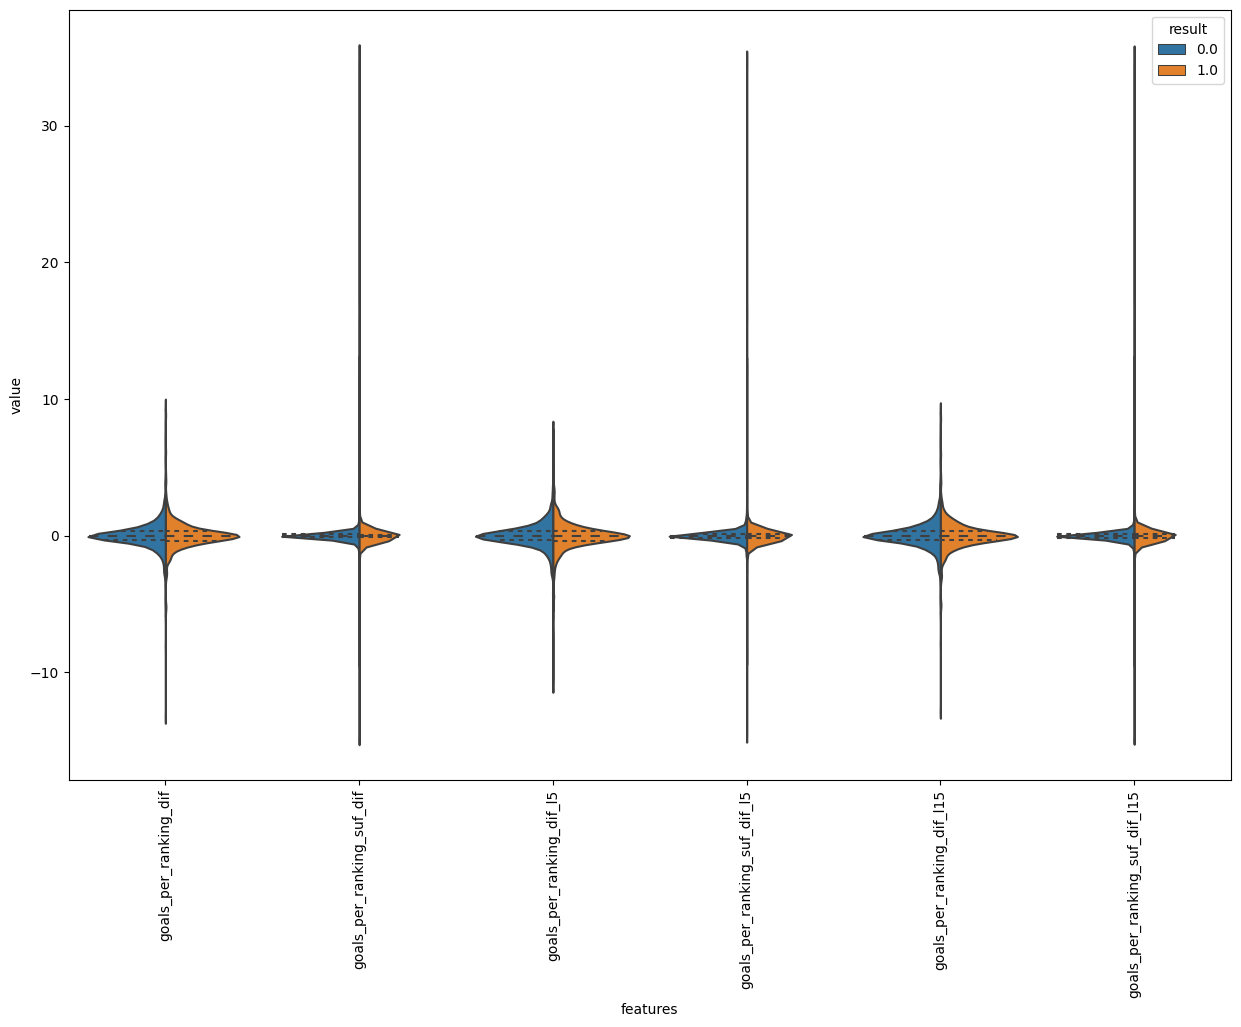

In [53]:
data_difs = dif.iloc[:, -6:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["result"] = df["result"]
violin = pd.melt(scaled,id_vars="result", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="result", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Como os valores são pequenos, o violin plot não consegue demonstrar a diferença de maneira efetiva visualmente, assim vamos utilizar o boxplot:

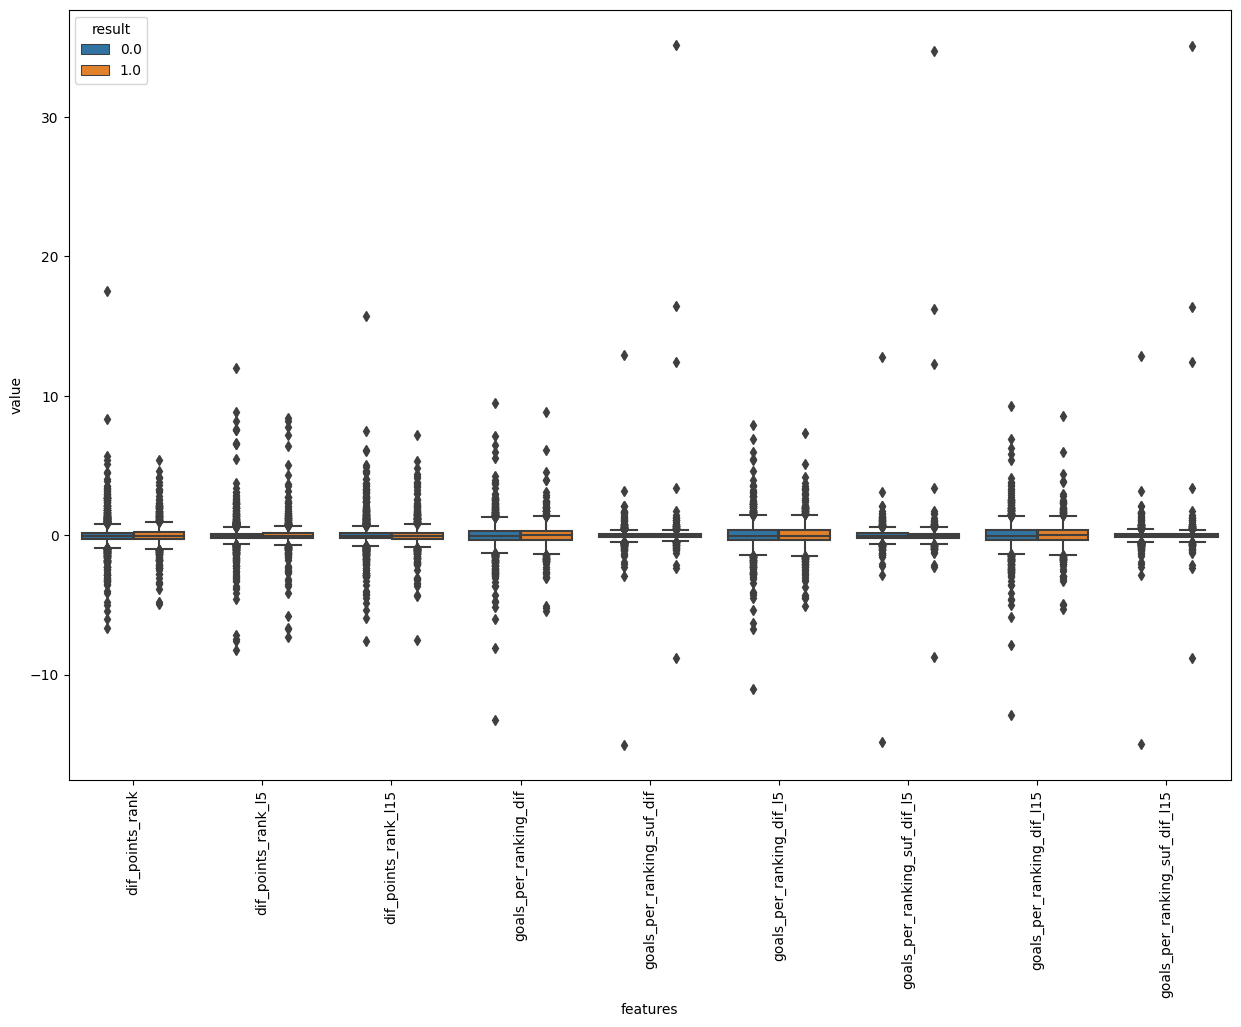

In [54]:
data_difs = dif.iloc[:, -9:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["result"] = df["result"]
violin = pd.melt(scaled,id_vars="result", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="result", data=violin)
plt.xticks(rotation=90)
plt.show()

Diferença de pontos, diferença de pontos por ranking dos adversários, diferença de classificação e diferença de ranking enfrentado.  Considerando todo o ciclo, últimos 5 jogos e últimos 15. Agora vamos utilizar gráficos de pontos para verificar suas distribuições.

In [55]:
data_difs = dif.iloc[:, -24:]

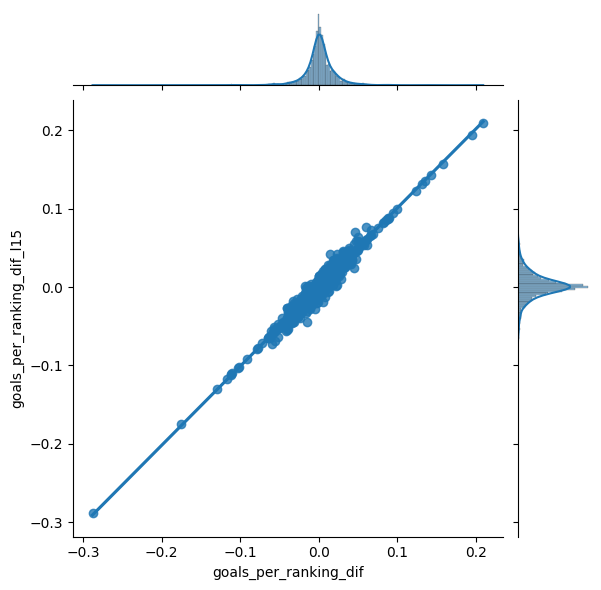

In [56]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l15', kind="reg")
plt.show()

Diferença de gols pelo ranking do adversário tanto no ciclo inteiro, últimos 5 jogos ou últimos 15 tem distribuições similares. Então vamos utilizar apenas o do ciclo inteiro.

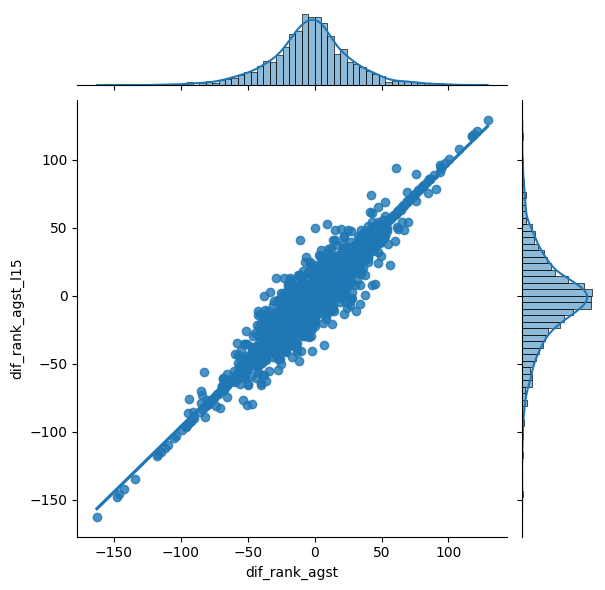

In [57]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l15', kind="reg")
plt.show()

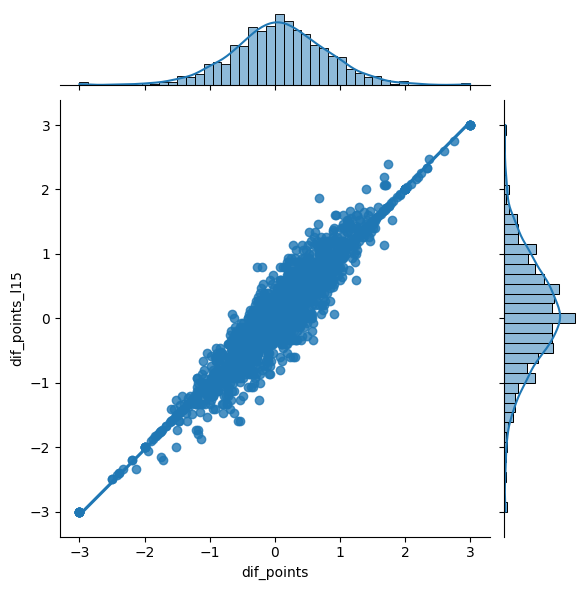

In [58]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l15', kind="reg")
plt.show()

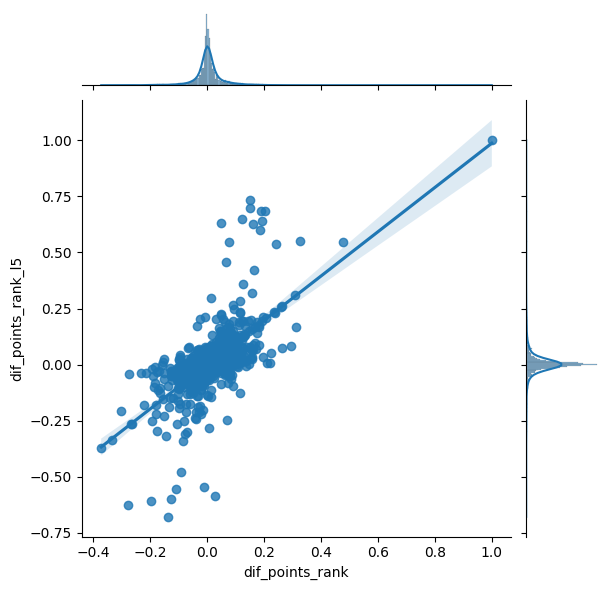

In [59]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

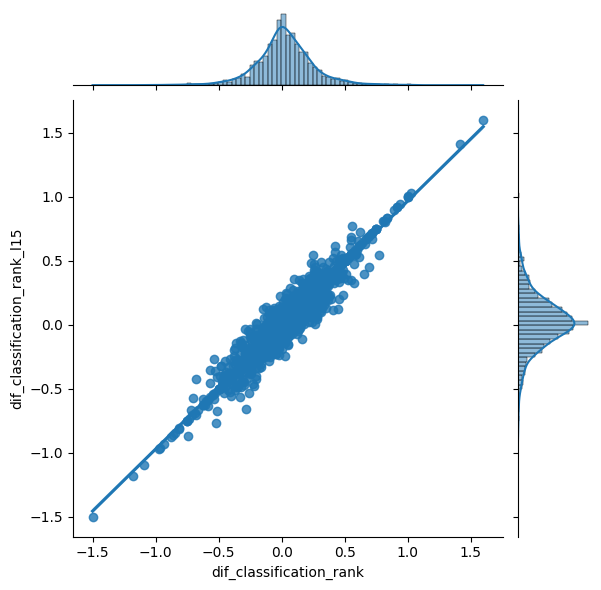

In [60]:
sns.jointplot(data = data_difs, x = 'dif_classification_rank', y = 'dif_classification_rank_l15', kind="reg")
plt.show()

Assim como em diferença de gols pelo ranking do adversário tanto no ciclo inteiro, a diferença da classificação do ranking nos últimos 5 jogos ou últimos 15 tem distribuições similares. Então vamos utilizar apenas o do ciclo inteiro.

Para a diferença de ranking do adversário enfrentando, pontos pelo ranking do adversário enfrentando e média de pontos conquistada pela média de pontos do ranking enfrentando, as 3 versões (ciclo, 5 e 15 últimos jogos) não são similares. Então, vamos usar todos:

Assim, as covariáveis finais ficam:

- rank_dif
- goals_dif
- goals_dif_l5
- goals_suf_dif
- goals_suf_dif_l5
- dif_rank_agst
- dif_rank_agst_l5
- goals_per_ranking_dif
- dif_points_rank
- dif_points_rank_l5
- is_friendly

In [61]:
def create_db(df):
    columns = ["home_team", "away_team", "result", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", 
                "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", 
                "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", 
                "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5",
                "is_friendly_0", "is_friendly_1", 
                "home_game_points_by_classification_mean", "away_game_points_by_classification_mean",
                "home_game_points_by_classification_mean_l5", "away_game_points_by_classification_mean_l5"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    base.loc[:, "dif_points_by_classification"] =  base["home_game_points_by_classification_mean"] - base["away_game_points_by_classification_mean"]
    base.loc[:, "dif_points_by_classification_l5"] =  base["home_game_points_by_classification_mean_l5"] - base["away_game_points_by_classification_mean_l5"]

    model_df = base[["home_team", "away_team", "result", "rank_dif", 
                    "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", 
                    "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", 
                    "is_friendly_0", "is_friendly_1",
                    "dif_points_by_classification"]]
    return model_df

# Onde era target coloquei result

In [62]:
def create_db2(df):
    columns = ["home_team", "away_team", "result", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", 
                "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", 
                "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", 
                "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5",
                "is_friendly_0", "is_friendly_1", 
                "home_game_points_by_classification_mean", "away_game_points_by_classification_mean",
                "home_game_points_by_classification_mean_l5", "away_game_points_by_classification_mean_l5", 
                "home_goals_mean_l15", "away_goals_mean_l15", "home_goals_suf_mean_l15", "away_goals_suf_mean_l15",
                "home_rank_mean_l15", "away_rank_mean_l15", "home_game_points_rank_mean_l15",
                "away_game_points_rank_mean_l15", 
                ]

    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_rank_agst_l15"] = base["home_rank_mean_l15"] - base["away_rank_mean_l15"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    base.loc[:, "dif_points_rank_l15"] = base["home_game_points_rank_mean_l15"] - base["away_game_points_rank_mean_l15"]

    base.loc[:, "dif_points_by_classification"] =  base["home_game_points_by_classification_mean"] - base["away_game_points_by_classification_mean"]
    base.loc[:, "dif_points_by_classification_l5"] =  base["home_game_points_by_classification_mean_l5"] - base["away_game_points_by_classification_mean_l5"]
    
    model_df = base[["home_team", "away_team", "result", "rank_dif", 
                    "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", 
                    "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", 
                    "is_friendly_0", "is_friendly_1", 
                    "dif_rank_agst_l15", "dif_points_rank_l15", 
                    "dif_points_by_classification", "dif_points_by_classification_l5"]]
    return model_df


In [63]:
model_db = create_db(df)

In [64]:
model_db2 = create_db2(df)

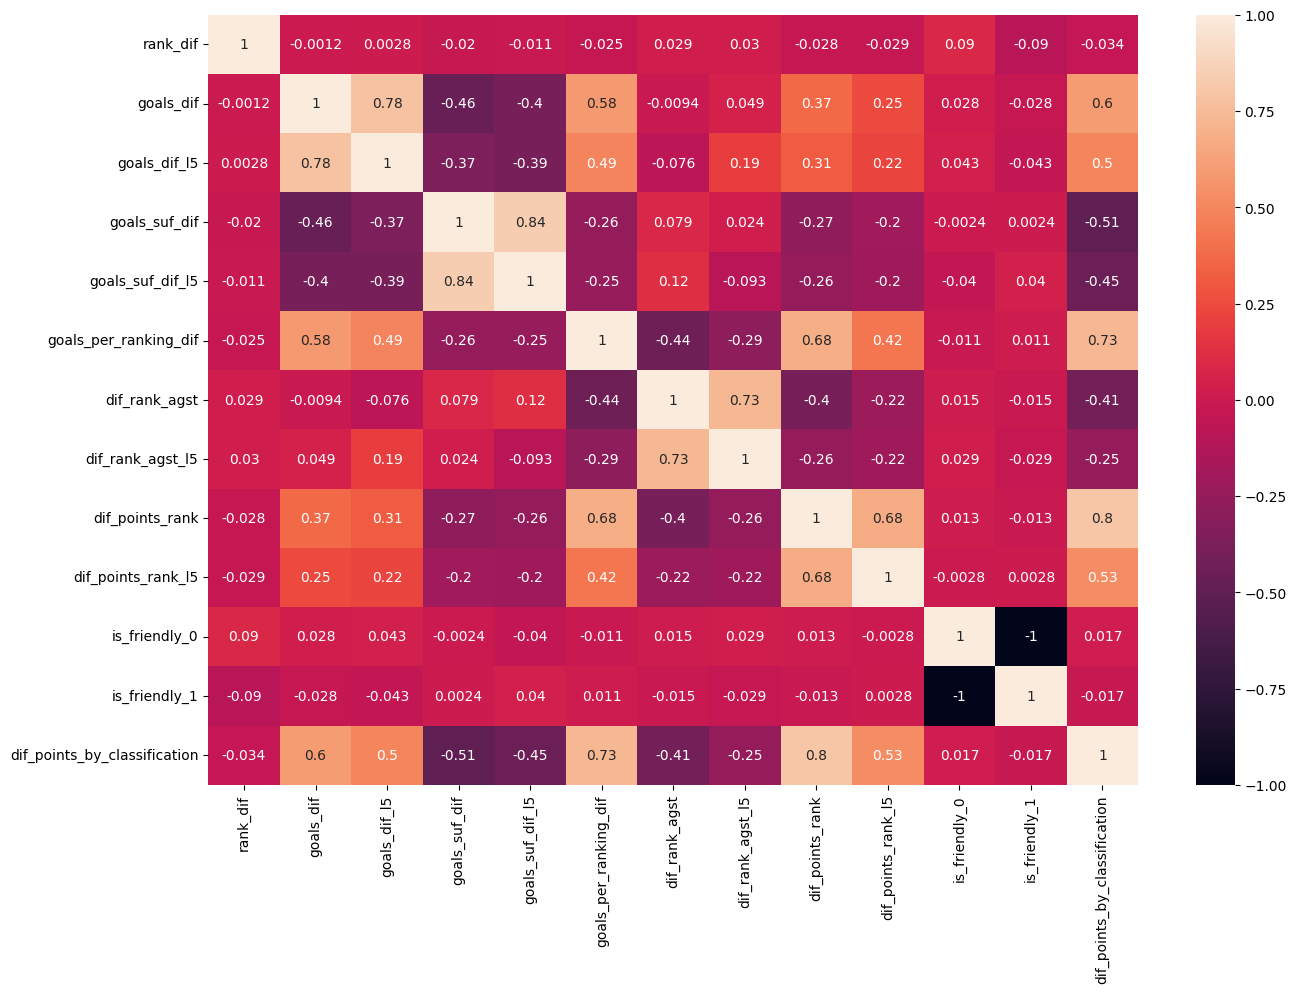

In [65]:
plt.figure(figsize=(15, 10))
sns.heatmap(model_db.iloc[:,3:].corr(), annot=True)
plt.show()

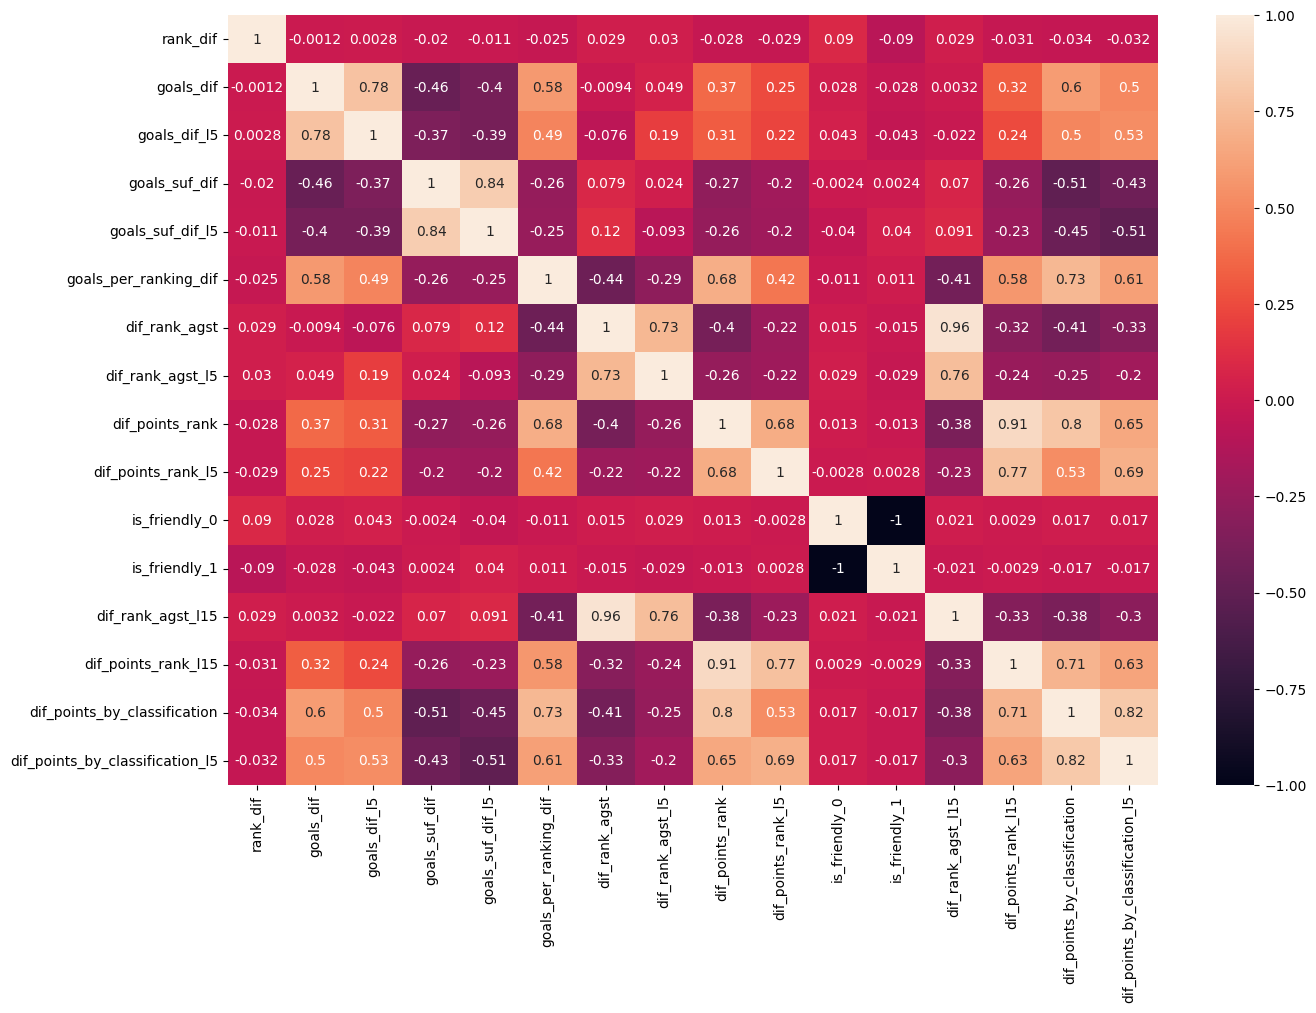

In [66]:
plt.figure(figsize=(15, 10))
sns.heatmap(model_db2.iloc[:,3:].corr(), annot=True)
plt.show()

# Exportando datasets

In [67]:
model_db.to_csv(r'modelling_dataset.csv', index = False, header=True)

In [68]:
model_db

,home_team,away_team,result,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1,dif_points_by_classification
10,Barbados,Cuba,1.0,-21.0,0.000000,0.000000,0.000000,0.000000,0.100000,-9.000000,-9.000000,0.100000,0.100000,0,1,0.500000
13,Nepal,Bhutan,0.0,-22.0,0.333333,0.333333,0.333333,0.333333,0.026383,-1.000000,-1.000000,0.207163,0.207163,1,0,0.833333
14,Bangladesh,Pakistan,0.0,-7.0,-0.166667,-0.166667,-1.333333,-1.333333,0.087472,-14.166667,-14.166667,0.235261,0.235261,1,0,1.027778
21,Denmark,Wales,0.0,-10.0,3.000000,3.000000,-3.000000,-3.000000,0.017857,35.000000,35.000000,0.017857,0.017857,1,0,0.300000
22,Bulgaria,Norway,0.0,-6.0,-5.000000,-5.000000,0.000000,0.000000,-0.029762,-5.000000,-5.000000,-0.017857,-0.017857,1,0,-0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,Republic of Ireland,Armenia,0.0,-45.0,0.344218,0.000000,0.602721,-0.600000,0.014320,-6.678458,7.600000,-0.099564,0.019074,1,0,-0.158662
3221,Norway,Serbia,1.0,11.0,-0.120393,-0.800000,0.708845,1.000000,-0.004974,13.398649,1.200000,-0.016839,0.000768,1,0,-0.101070
3223,Kosovo,Cyprus,0.0,-2.0,-0.063147,0.000000,0.149068,-0.400000,-0.000550,-1.704969,14.200000,-0.033225,0.010023,1,0,-0.124146
3224,Greece,Northern Ireland,0.0,-9.0,0.292683,-0.200000,-0.121951,0.400000,0.006503,-9.951220,1.400000,0.004148,-0.013675,1,0,0.026626
